# 確率分布

## 1. 確率分布を生成するPythonモジュール

　具体的な確率分布を確認する前に, Python にある確率分布生成に有効なモジュールについて説明.

### 1.1. SciPy

　高水準の科学計算を提供するモジュールである [SciPy](https://scipy.org) を用いて様々な確率分布の乱数生成, 確率分布関数を取得することができる.
 
- [関係モジュールドキュメント (`scipy.stats`)](https://docs.scipy.org/doc/scipy/reference/stats.html)

<u>基本的な使い方</u>  
　モジュール構成として `scipy.stats.{確率分布名}` という形式で各確率分布のクラスが存在する.

```python
# 二項分布の場合
from scipy.stats import binom

# 正規分布の場合
from scipy.stats import norm
```

`import` した確率分布のクラスを用いて以下メソッドを利用することができる. 以下の `**param_kwargs` は確率分布ごとに変わりうるパラメータである. 例えば, `scipy.stats.norm` の場合は `loc`, `scale` が該当する.

| Class method                                     |                                                                             |
| ------------------------------------------------ | --------------------------------------------------------------------------- |
| `rvs(**param_kwargs, size=1, random_state=None)` | `size` の数だけ分布に従った擬似乱数を生成.                                        |
| `pdf(x, **param_kwargs)`                         | (連続型の確率分布のみ存在) 確率密度関数の値 $f(x)$.                                |
| `pmf(x, **param_kwargs)`                         | (離散型の確率分布のみ存在) 確率質量関数の値 $f(x)$.                                |
| `cdf(x, **param_kwargs)`                         | 累積確率分布の値 $F(x)$.                                                       |
| `stats(**param_kwargs, moments="mv")`            | `moments` の値によって統計値を取得 (`m`: 期待値, `v`: 分散, `s`: 歪度, `k`: 尖度). |
| `median(**param_kwargs)`                         | 分布のメディアン値.                                                            |
| `mean(**param_kwargs)`                           | 分布の期待値.                                                                 |
| `var(**param_kwargs)`                            | 分布の分散.                                                                   |
| `std(**param_kwargs)`                            | 分布の標準偏差.                                                               |

<u>確率分布</u>  
　`**param_kwargs` で分布の形状を決めるにあたって必要な引数とセット.

- 離散型  
    - [ベルヌーイ分布 ( `bernoulli` )](python-example-bernoulli)
        - `p` : 成功確率.
    
    - [二項分布 ( `binom` )](python-example-binomial)
        - `n` : 二項分布の試行回数.
        - `p` : 成功確率.
    
    - [ポアソン分布 ( `poisson` )](python-example-poisson)
        - `mu` : ポアソン分布の平均発生数 (期待値).
    
    - [幾何分布 ( `geom` )](python-example-geometric)
        - `p` : 成功確率.
    
    - [負の二項分布 ( `nbinom` )](python-example-nbinom)
        - `n` : 成功回数.
        - `p` : 成功確率.
    
- 連続型  
    - [一様分布 ( `uniform` )](python-example-uniform)
        - `loc=0` : 区間 `[loc, loc + scale]` で定義された一様分布の右値.
        - `scale=1` : 区間 `[loc, loc + scale]` で定義された一様分布の区間幅.
    
    - [正規分布 ( `norm` )](python-example-normal)
        - `loc` : 正規分布の期待値.
        - `scale` : 正規分布の標準偏差.
    
    - [対数正規分布 ( `lognorm` )](python-example-lognormal)
        - `s`
        - `scale`
    
    - [指数分布 ( `expon` )](python-example-exponential)
        - `scale`
    
    - [ガンマ分布 ( `gamma` )](python-example-gamma)
        - `a`
        - `scale`
    
    - [ベータ分布 ( `beta` )](python-example-beta)
        - `a`
        - `b`

### 1.2. NumPy

　また行列演算の際に有効なモジュールである [NumPy](https://numpy.org) においても乱数生成機能を持つ.

- [関係モジュールドキュメント (`numpy.random.Generator`)](https://numpy.org/doc/stable/reference/random/generator.html)

<u>基本的な使い方</u>  
　モジュール構成として `numpy.random.Generator.{確率分布名}` という形式で各確率分布のクラスが存在する. 通常は `numpy.random.default_rng()` でコンストラクタを定義し, 確率分布に対応するモジュール ( `numpy.random.default_rang().{確率分布名}` ) を呼び出す方法で使う.

```python
import numpy as np

rng = np.random.default_rng(seed=12345)
normal_rvs = rng.normal(loc=0, scale=1, size=1000)
```

SciPy と違って各確率分布に対応した擬似乱数生成するメソッドが存在している.

<u>確率分布</u>  
　確率分布に対応するメソッド名. `size` は共通して生成する乱数の個数.  

- 離散型  
    - [ベルヌーイ分布](python-example-bernoulli)
        - 二項分布において `n = 1` とする.
    
    - [二項分布 ( `binomial(n, p, size=None)` )](python-example-binomial)
        - `n` : 二項分布の試行回数.
        - `p` : 成功確率.
    
    - [ポアソン分布 ( `poisson(lam=1.0, size=None)` )](python-example-poisson)
        - `lam` : ポアソン分布の平均発生数 (期待値).
    
    - [幾何分布 ( `geometric(p, size=None)` )](python-example-geometric)
        - `p` : 成功確率.
    
    - [負の二項分布 ( `negative_binomial` )](python-example-nbinom)
        - `n` : 成功回数.
        - `p` : 成功確率.
    
- 連続型  
    - [一様分布 ( `uniform(low=0.0, high=1.0, size=None)` )](python-example-uniform)
        - `low` : 区間 `[low, high]` で定義された一様分布の右値.
        - `high` : 区間 `[low, high]` で定義された一様分布の左値.
    
    - [正規分布 ( `normal(loc=0.0, scale=1.0, size=None)` )](python-example-normal)
        - `loc` : 正規分布の期待値.
        - `scale` : 正規分布の標準偏差.
    
    - [対数正規分布 ( `lognorm(mean=0.0, sigma=1.0, size=None)` )](python-example-lognormal)
        - `mean` : もとになっている正規分布の期待値.
        - `sigma` : もとになっている正規分布の標準偏差.
    
    - [指数分布 ( `exponential(scale=1.0, size=None)` )](python-example-exponential)
        - `scale`
    
    - [ガンマ分布 ( `gamma(shape, scale=1.0, size=None)` )](python-example-gamma)
        - `shape`
        - `scale`
    
    - [ベータ分布 ( `beta(a, b, size=None)` )](python-example-beta)
        - `a`
        - `b`

　本セクションで使用するモジュールを予めインポート, 定義しておく.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import (
    bernoulli,
    beta,
    binom,
    expon,
    gamma,
    geom,
    lognorm,
    nbinom,
    norm,
    poisson,
    uniform,
)

sns.set()

rng = np.random.default_rng(seed=12345)

## 2. 離散型の確率分布

### 例 2.1 (ベルヌーイ分布)

　**ベルヌーイ分布** (Bernoulli distribution) コインの裏表のように2種類の可能な結果 (成功を S, 失敗を F) を生じる試行 (**ベルヌーイ試行** (Bernoulli trials) と言う) に対する確率分布.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　成功 S が起きる確率を $p$ とした場合, 確率変数 $X$ について成功 S の時に $X=1$, 失敗 F の時に $X = 0$ とする. この時の確率質量関数は以下の通り.

$$
    f(x) = p^x(1-p)^{1-x}
$$

</div>

　ここで[離散型の確率分布の性質](discrete-distribution)を確認する.  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明. また合計和についても以下から分かる.

$$
    \begin{align}
        \sum_{x=0}^{1}{f(x)} = (1-p) + p = 1
    \end{align}
$$


#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = p \\
        & {\rm Var}(X) = p(1-p)
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \sum_{x=0}^{1}{xp^x(1-p)^{1-x}} \\
                   &= p
    \end{align}
$$

と計算できる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めることで分散も求められる.

$$
    \begin{align}
        {\rm E}(X^2) &= \sum_{x=0}^{1}{x^2 p^x(1-p)^{1-x}} \\
                     &= p
    \end{align}
$$

よって

$$
    {\rm Var}(X) = {\rm}E(X^2) - ({\rm E}(X))^2 = p - p^2 = p(1-p)
$$

(python-example-bernoulli)=
#### Python での確認

- [SciPy ( `scipy.stats.bernoulli` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli)
    - `p` : 成功確率 $p$
    
- [NumPy ( `numpy.random.Generator.binomial` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html)
    - ベルヌーイ分布単独のメソッドはないので `n=1` とする.
    - `p` : 成功確率 $p$

In [2]:
# 成功確率 p = 0.3 のベルヌーイ分布に従った疑似乱数を size = 10000 だけ生成.
p = 0.3
size = 10000

# SciPy
rvs = bernoulli.rvs(p=p, size=size)
print("> SciPy")
print(rvs[0:100])

# NumPy
rvs_numpy = rng.binomial(n=1, p=p, size=size)
print("> NumPy")
print(rvs_numpy[0:100])

> SciPy
[1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]
> NumPy
[0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0]


In [3]:
# 以降, 乱数から期待値・分散を計算するので関数化
def calculate_stats(rvs):
    """Calculate mean and variance from rvs
    
    Parameters
    ----------
    rvs : {numpy.ndarrary, list}
        Data to be calculated.
        
    Return
    ------
    Mean and variance.
    """
    if not isinstance(rvs, (np.ndarray, list)):
        msg = "Speficed rvs must be np.ndarray or list"
        raise TypeError(msg)
    return np.mean(rvs), np.var(rvs)

In [4]:
# 期待値・分散の理論値
exp_true = bernoulli.mean(p=p)
var_true = bernoulli.var(p=p)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 0.3014 vs 0.3
分散(乱数 vs 真値): 0.21055804000000003 vs 0.21
> NumPy
期待値(乱数 vs 真値): 0.2951 vs 0.3
分散(乱数 vs 真値): 0.20801598999999996 vs 0.21


Text(0.5, 1.0, 'Bernoulli Distribution (p = 0.3)')

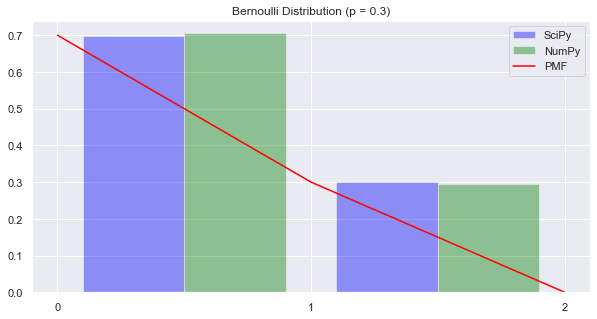

In [5]:
# 確率変数 x を渡すことで, それぞれに対応する確率質量関数の値を取得できる.
x = np.arange(0, 3, 1)
y = bernoulli.pmf(k=x, p=p)

# 擬似乱数によるヒストグラムと確率質量関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PMF", color="red")
ax1.set_xticks(x)
ax1.legend()
ax1.set_title(f"Bernoulli Distribution (p = {p})")

#### ユースケース

　単独で使用することはあまりないが, 統計モデルの一部にベルヌーイ分布を仮定することが多い. 現象が2パターンしか取り得ないような「会員登録の実施有無」, 「レビュー記事に対して高評価をするかしないか」, 「購買行動を行うか否か」にベルヌーイ分布を仮定する.
 
- 商品レビューが有用かどうか ([柴田と伊東, 2019](https://www.jstage.jst.go.jp/article/jsaikbs/118/0/118_05/_pdf). この論文内ではベルヌーイ分布による評価の代替評価を提案している.)
- ECサイト利用者に対して施策を売った際にどういったセグメントグループに効果的に機能したかを推定するモデル内において, セグメントグループの購買有無に対してベルヌーイ分布を仮定 ([松嵜ら, 2017](https://ipsj.ixsq.nii.ac.jp/ej/?action=repository_action_common_download&item_id=185104&item_no=1&attribute_id=1&file_no=1))

### 例 2.2 (二項分布)

　**二項分布** (binomial distribution) は結果が 2 つの試行 (成功を S, 失敗を F) を何度も繰り返すことによって起こる確率分布.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　S が 確率 $p (0 \leq p \leq 1)$ で $x$ 回, F が確率 $1-p$ で $n-x$ 回生じるとすると, $x=0,1, \cdots, n$ であって, その確率質量関数は以下の通り.

$$
    f(x) = {}_n{\rm C}_{x} p^x (1-p)^{n-x}
$$

</div>

確率変数 $X$ が 二項分布に従っていることを $X \sim Bi(n, p)$ と記載する.

　ここで[離散型の確率分布の性質](discrete-distribution)を確認する.  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明. また合計和については下記よりまさに二項展開式より 1 となる.

$$
    \begin{align}
        \sum_{x=0}^{n}{ {}_n{\rm C}_{x} p^x (1-p)^{n-x} } = {(1-p) + p}^n = 1.
    \end{align}
$$


#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = np \\
        & {\rm Var}(X) = np(1-p)
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \sum_{x=0}^{n}{ x{}_n{\rm C}_{x} p^x (1-p)^{n-x} } \\
                   &= \sum_{x=1}^{n}{ n{}_{n-1}{\rm C}_{x-1} p^x (1-p)^{n-x} } \quad (\text{二項係数の性質より} x{}_n{\rm C}_{x} = n{}_{n-1}{\rm C}_{x-1})\\
                   &= \sum_{x=1}^{n}{ n{}_{n-1}{\rm C}_{x-1} p^x (1-p)^{n-x} } \\
                   &= np \sum_{x=1}^{n}{ {}_{n-1}{\rm C}_{x-1} p^{x-1} (1-p)^{n-x} } \\
                   &= np \sum_{x'=0}^{n'}{ {}_{n'}{\rm C}_{x'} p^{x'} (1-p)^{n'-x'} } \quad(n-1=n', x-1=x') \\
                   &= np
    \end{align}
$$

と計算できる. また分散について[分散と期待値の関係式](expect-variance)から

$$
    \begin{align}
        {\rm V}(X) &= {\rm E}(X^2) - ({\rm E}(X))^2 \\
                   &= {\rm E}(X(X-1) + X) - ({\rm E}(X))^2 \\
                   &= {\rm E}(X(X-1)) + {\rm E}(X) - ({\rm E}(X))^2
    \end{align}
$$

より ${\rm E}(X(X-1))$ を求めれば良い. 二項係数について

$$
    \begin{align}
        & {}_n{\rm C}_{x} = \frac{n}{x} {}_{n-1}{\rm C}_{x-1} = \frac{n}{x} \cdot \frac{n-1}{x-1} \cdot {}_{n-2}{\rm C}_{x-2} \\
        &\Leftrightarrow x(x-1) {}_n{\rm C}_{x} = n(n-1) {}_{n-2}{\rm C}_{x-2}
    \end{align}
$$

より

$$
    \begin{align}
        {\rm E}(X(X-1)) &= \sum_{x=0}^{n}{ x(x-1) {}_n{\rm C}_{x} p^x (1-p)^{n-x} } \\
                        &= \sum_{x=2}^{n}{ n(n-1) {}_{n-2}{\rm C}_{x-2} p^x (1-p)^{n-x} } \\
                        &= n(n-1)p^2 \sum_{x=2}^{n}{ {}_{n-2}{\rm C}_{x-2} p^{x-2} (1-p)^{n-x} } \\
                        &= n(n-1)p^2 \sum_{x"=0}^{n"}{ {}_{n"}{\rm C}_{x"} p^{x"} (1-p)^{n"-x"} } \quad (n-2=n", x-2=x")\\
                        &= n(n-1)p^2
    \end{align}
$$

よって

$$
    {\rm Var}(X) = n(n-1)p^2 + np - (np)^2 = np(1-p).
$$

(python-example-binomial)=
#### Python での確認

- [SciPy ( `scipy.stats.binom` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)
    - `n` : ベルヌーイ試行回数 $n$.
    - `p` : 成功確率 $p$. 
- [NumPy ( `numpy.random.Generator.binomial` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html)
    - `n` : ベルヌーイ試行回数 $n$.
    - `p` : 成功確率 $p$. 


In [6]:
# 試行回数 n = 10, 成功確率 p = 0.3 の二項分布に従った疑似乱数を size = 10000 だけ生成する.
n = 10
p = 0.3
size = 10000

# SciPy
rvs = binom.rvs(n=n, p=p, size=size)
print("> SciPy")
print(rvs[0:100])

# NumPy
rvs_numpy = rng.binomial(n=n, p=p, size=size)
print("> NumPy")
print(rvs_numpy[0:100])

> SciPy
[2 1 5 4 5 3 1 3 2 2 5 2 3 4 3 3 5 1 2 3 0 3 5 5 5 3 3 3 2 2 2 1 1 3 2 2 4
 0 4 3 2 1 4 5 5 6 4 3 4 1 4 2 2 3 5 6 1 4 3 6 3 3 5 4 3 4 5 4 5 4 2 3 2 6
 1 4 3 3 2 2 1 2 1 4 3 2 4 5 0 1 4 3 0 4 3 5 2 4 3 3]
> NumPy
[5 5 4 2 4 2 4 3 2 3 3 1 6 2 4 5 3 5 6 1 3 4 6 4 7 3 4 2 3 2 5 4 5 2 4 2 3
 3 3 5 2 4 3 2 5 2 2 2 3 1 4 2 2 2 5 4 3 3 5 1 3 4 5 4 4 5 5 2 2 2 7 1 3 2
 4 4 1 3 1 0 1 5 2 6 3 2 5 3 2 2 1 4 3 5 2 4 5 1 3 5]


In [7]:
# 期待値・分散の理論値
exp_true = binom.mean(n=n, p=p)
var_true = binom.var(n=n, p=p)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 2.9822 vs 3.0
分散(乱数 vs 真値): 2.08488316 vs 2.0999999999999996
> NumPy
期待値(乱数 vs 真値): 3.0054 vs 3.0
分散(乱数 vs 真値): 2.14157084 vs 2.0999999999999996


Text(0.5, 1.0, 'Binomial Distribution (n = 10, p = 0.3)')

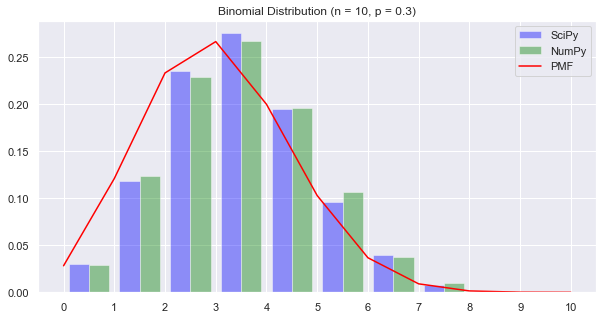

In [8]:
# 確率変数 x を渡すことで, それぞれに対応する確率質量関数の値を取得できる.
x = np.arange(0, 11, 1)
y = binom.pmf(k=x, n=n, p=p)

# 擬似乱数によるヒストグラムと確率質量関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PMF", color="red")
ax1.set_xticks(x)
ax1.legend()
ax1.set_title(f"Binomial Distribution (n = {n}, p = {p})")

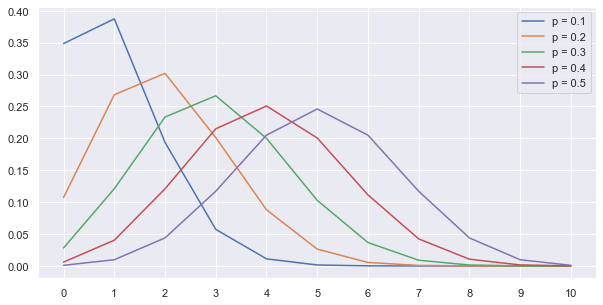

In [9]:
# n = 10 で固定し p のみを動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

ps = [0.1, 0.2, 0.3, 0.4, 0.5]
for p in ps:
    y = binom.pmf(x, n=n, p=p)
    label = f"p = {p}"
    ax2.plot(x, y, label=label)

ax2.set_xticks(x)
ax2.legend()

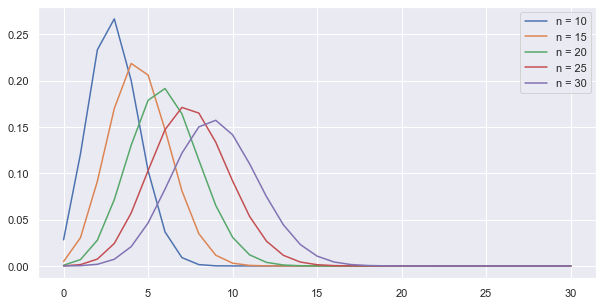

In [10]:
# p = 0.3 で固定し n のみを動かした時の波形の違い.
p = 0.3

fig = plt.figure(figsize=(10, 5))
ax3 = fig.add_subplot(111)

ns = [10, 15, 20, 25, 30]
x = np.arange(0, max(ns) + 1, 1)
for n in ns:
    y = binom.pmf(x, n=n, p=p)
    label = f"n = {n}"
    ax3.plot(x, y, label=label)

ax3.legend()

#### ユースケース
 
- バナー広告のインプレッション数 $n$ 回のうち, クリック率 $p$ で広告がクリックされる回数 ([本橋ら, 2012](http://www.orsj.or.jp/archive2/or57-10/or57_10_574.pdf))
- 特定のサービスにおいて $n$ 人の利用ユーザーのうち, 確率 $p$ で解約する人数
- 特定の病気において $n$ 人の被験者のうち, 病気の発症率 $p$ がどのように変わるか

### 例 2.3 (ポアソン分布)

　**ポアソン分布** (Poisson distribution) とは, 二項分布において $n$ が大 (すなわち大量の観測) である一方, $p$ が小 (すなわち希少現象) である分布.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$\lambda > 0, x \geq 0$ として確率質量関数は以下の通り.

$$
    f(x) = \frac{e^{-\lambda} \lambda^{x}}{x!}
$$

</div>

　ここで[離散型の確率分布の性質](discrete-distribution)を確認する.  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明. また, $e^x$ について[マクローリン展開](https://ja.wikipedia.org/wiki/テイラー展開)から

$$
    \begin{align}
        e^x &= 1 + \frac{x}{1!} + \frac{x^2}{2!} + \cdots + \frac{x^k}{k!} + \cdots \\
            &= \sum_{k=0}^{\infty}{\frac{x^k}{k!}}
    \end{align}
$$

と書けるので,

$$
\sum_{x=0}^{\infty}{f(x)} = \sum_{x=0}^{\infty}{\frac{e^{-\lambda} \lambda^{x}}{x!}} = e^{-\lambda} \sum_{x=0}^{\infty}{\frac{ \lambda^{x}}{x!}} = e^{-\lambda} \cdot e^{\lambda} = 1
$$

と分かる.  

　確率変数 $X$ がポアソン分布に従う時, $X \sim Po(\lambda)$ または $X \sim Poisson(\lambda)$ と記載する.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">
    
$$
    \begin{align}
        & {\rm E}(X) = \lambda \\
        & {\rm Var}(X) = \lambda
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \sum_{x=0}^{\infty}{x\frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                   &= \lambda e^{-\lambda}\sum_{x=1}^{\infty}{\frac{\lambda^{x-1}}{(x-1)!}} \\
                   &= \lambda e^{-\lambda} \cdot e^{\lambda} \\
                   &= \lambda
    \end{align}
$$

と計算できる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めることで分散も求められる.

$$
    \begin{align}
        {\rm E}(X^2) &= \sum_{x=0}^{\infty}{x^2\frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                     &= \sum_{x=0}^{\infty}{\{x(x-1) + x\} \frac{e^{-\lambda}\lambda^{x}}{x!}} \\
                     &= \lambda^2 e^{-\lambda}\sum_{x=2}^{\infty}{\frac{\lambda^{x-2}}{(x-2)!}} + \lambda e^{-\lambda}\sum_{x=1}^{\infty}{\frac{\lambda^{x-1}}{(x-1)!}} \\
                     &= \lambda^2 + \lambda \\
    \end{align}
$$

よって

$$
    {\rm Var}(X) = {\rm}E(X^2) - ({\rm E}(X))^2 = \lambda^2 + \lambda - \lambda^2 = \lambda
$$

(python-example-poisson)=
#### Python での確認

- [SciPy ( `scipy.stats.poisson` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)
    - `mu` : $\lambda$. 
- [NumPy ( `numpy.random.Generator.poisson` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html)
    - `lam` : $\lambda$.


In [11]:
# lambda = 5.0 のポアソン分布に従った疑似乱数を size = 10000 だけ生成する.
mu = lam = 5.0
size = 10000

# SciPy
rvs = poisson.rvs(mu=mu, size=size)
print("> SciPy")
print(rvs[0:100])

# NumPy
rvs_numpy = rng.poisson(lam=lam, size=size)
print("> NumPy")
print(rvs_numpy[0:100])

> SciPy
[ 7  4  6  8 10  5  6  3  7  4  5  5  3  2  3  3  5  5  3  2  9  5  8  1
 10  5  5  7  8  1  1  2  3  9  4  4 10  2  5  4  1  9  6  7  5  6  3 10
  3  4  4  5  8  9  5  8  9  7  6  6  5  4  9  5  2  9  6  5  5  6  2  6
  9  9  4  7  9  4  5  6  5  4  4  8  8  6  4  5  2  5  5  6  9  7  3  2
  6  6  4  4]
> NumPy
[ 3  4 10  3  3  2 13  6  5  2  6  5  5  2  5  4  3  3  4  6  8  6  8  7
  4  5  3  4  7  7  4  3  7  6  4  4  2  5  2  7  3  4  5  4  6  5  4  8
  6  3  4  3  3  5  2  3  4  6  2  6  4  7  5  5  6  3  5  9  4  3  1  5
  2  5  6  1  5  5  7 10  6  7  5  8  3  5  2  3  3  1  4  5  1  5  6 12
  5  5  3  5]


In [12]:
# 期待値・分散の理論値
exp_true = poisson.mean(mu=mu)
var_true = poisson.var(mu=mu)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 5.036 vs 5.0
分散(乱数 vs 真値): 4.969104000000001 vs 5.0
> NumPy
期待値(乱数 vs 真値): 5.0234 vs 5.0
分散(乱数 vs 真値): 4.98485244 vs 5.0


Text(0.5, 1.0, 'Poisson Distribution (lambda = 5.0)')

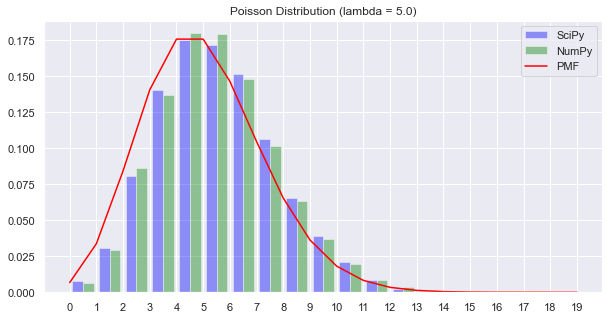

In [13]:
# 確率変数 x を渡すことで, それぞれに対応する確率質量関数の値を取得できる.
rvs_max = max(rvs.max(), rvs_numpy.max())
x = np.arange(0, rvs_max + 5, 1)
y = poisson.pmf(k=x, mu=mu)

# 擬似乱数によるヒストグラムと確率質量関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PMF", color="red")
ax1.set_xticks(x)
ax1.legend()
ax1.set_title(f"Poisson Distribution (lambda = {mu})")

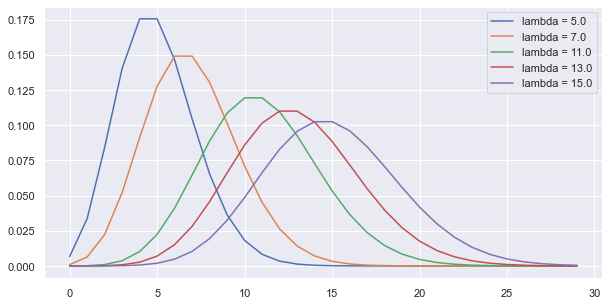

In [14]:
# lambda を動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

mus = [5.0, 7.0, 11.0, 13.0, 15.0]
x = np.arange(0, 30, 1)
for mu in mus:
    y = poisson.pmf(x, mu=mu)
    label = f"lambda = {mu}"
    ax2.plot(x, y, label=label)

ax2.legend()

　二項分布において $n \rightarrow \infty, p \rightarrow 0$ とすることでポアソン分布に近づく. ここで $\lambda = np$ とすれば確率質量関数 $f(x)$ は

$$
    \begin{align}
        f(x) &= {}_n{\rm C}_{x} \Bigl( \frac{\lambda}{n} \Bigr)^x \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{n-x} \\
             &= \frac{n(n-1) \cdots (n-x+1)}{x!} \frac{\lambda^x}{n^x} \Bigl( 1 - \frac{\lambda}{n} \Bigr)^n \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x} \\
             &= \frac{\lambda^x}{x!} \Bigl( 1 - \frac{\lambda}{n} \Bigr)^n \Bigl( 1 - \frac{1}{n} \Bigr) \Bigl( 1 - \frac{2}{n} \Bigr) \cdots \Bigl( 1 - \frac{k-1}{n} \Bigr) \Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x}
    \end{align}
$$

ここで, $n \rightarrow \infty$ とした時, $m = 1, 2, \cdots, k-1$ とすれば

$$
\lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{m}{n} \Bigr)} = 0, \quad \lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{\lambda}{n} \Bigr)^{-x}} = 0 \quad \lim_{n \rightarrow \infty}{\Bigl( 1 - \frac{\lambda}{n} \Bigr)^n} = e^{-\lambda}
$$

なので,

$$
    \lim_{n \rightarrow \infty}{f(x)} = \frac{e^{-\lambda} \lambda^{x}}{x!}
$$

とポアソン分布になる. 実際に python で二項分布とポアソン分布を比較する.

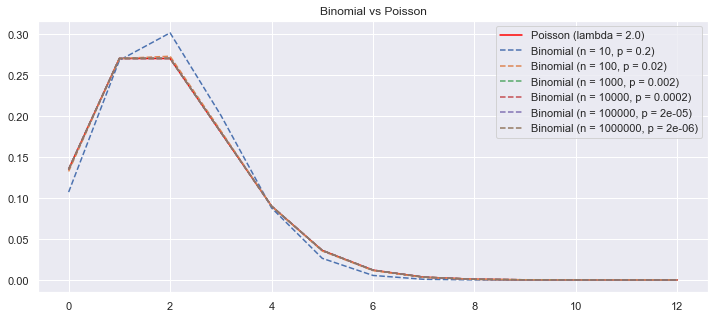

In [15]:
# x軸
x = np.arange(0, 13, 1)

# 図の定義
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(111)

# ポアソン分布
y = poisson.pmf(k=x, mu=2.0)
label = f"Poisson (lambda = 2.0)"
ax1.plot(x, y, color="red", label=label)

# 二項分布
scales = np.array([1, 10, 100, 1000, 10000, 100000])
base_n = 10
base_p = 0.2
for scale in scales:
    n = base_n * scale
    p = base_p / scale
    y = binom.pmf(k=x, n=n, p=p)
    label = f"Binomial (n = {n}, p = {p})"
    ax1.plot(x, y, linestyle="dashed", label=label)

ax1.set_title("Binomial vs Poisson")
ax1.legend()

#### ユースケース

- 交通事故件数
- 大量生産の不良品数 ([pyISC Example: Simple Anomaly Detection with Frequency Data](https://notebook.community/STREAM3/pyisc/docs/pyISC_simple_anomaly_example))
- 破産件数
- 火災件数
- 砲弾命中数
- 遺伝子の突然変異数
- 電話の呼び数
- 渋滞していない高速道路の料金ゲートへの車の到着台数
- 医学研究において顕微鏡視野に入る区画当たりのバクテリア数
- 物理現象として単位時間当たりのガイガー計数管の読み数

### 例 2.4 (幾何分布)

　成功 S (発生確率 $p$) と失敗 F (発生確率 $q = 1- p$) の 2 通りしかない試行を次々と続ける試行を考える. 最初の成功 S が出現するまでの試行回数を $x$ とするならば $x = 1, 2, 3, \cdots$ であり以下の確率質量関数で表現される確率分布を**幾何分布** (geometric distribution) という.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$0 \lt p \lt 1, q = 1 - p$ とする. 

$$
    f(x) = pq^{x-1} \quad (x = 1, 2, 3, \cdots)
$$

</div>

これは $x$ に応じて幾何級数 (等比数列) 的に減じていくため幾何分布という.  
　ここで[離散型の確率分布の性質](discrete-distribution)を確認する.  
　確率質量関数の定義から $f(x) \geq 0$ であることは自明. また, $0 \lt p \lt 1 \Rightarrow 0 \lt q \lt 1$ なので無限等比級数の和から

$$
\sum_{x=1}^{\infty}{f(x)} = p\sum_{x=1}^{\infty}{q} = p \cdot \frac{1}{1-q} = p \cdot \frac{1}{p} = 1
$$

と分かる.  

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{1}{p} \\
        & {\rm Var}(X) = \frac{q}{p^2}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) = \sum_{x=1}^{\infty}{x pq^{x-1}} = p \sum_{x=1}^{\infty}{ xq^{x-1} }
    \end{align}
$$

$0 \lt q \lt 1$ において

$$
    g(q) = \sum_{x = 0}^{\infty}{q^x} = \frac{1}{1-q}
$$

を考える. 第 3 項については無限等比級数の和から分かる. $q$ について微分すると

$$
    g'(q) = \sum_{x = 1}^{\infty}{xq^{x-1}} = \frac{1}{(1-q)^2}
$$

となり $p = 1 - q$ であることに注意して,

$$
    {\rm E}(X) = p \sum_{x=1}^{\infty}{ xq^{x-1} } = p \cdot \frac{1}{(1-q)^2} = \frac{1}{p}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)+X) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2
    \end{align}
$$

第 2 式から弟 3 式への変換は[期待値の4番目の性質](expectation-property)を用いている.
　${\rm}E(X(X-1))$ を求めれば分散が求められる. 上で用いた $g(q)$ を 2 階微分すると

$$
    g''(q) = \sum_{x = 2}^{\infty}{x(x-1)q^{x-2}} = \frac{2}{(1-q)^3}
$$

なので

$$
    {\rm E}(X(X-1)) = pq \sum_{x=2}^{\infty}{ x(x-1)q^{x-2} } = pq \frac{2}{(1-q)^3} = \frac{2(1-q)}{p^2}
$$

となり分散は

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2 \\
                     &= \frac{2(1-q)}{p^2} + \frac{1}{p} - \frac{1}{p^2} \\
                     &= \frac{1-p}{p^2} \\
                     &= \frac{q}{p^2}
    \end{align}
$$

と分かる.

(python-example-geometric)=

#### Python での確認

- [SciPy ( `scipy.stats.geom` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom)
    - `p` : 成功確率 $p$.
- [NumPy ( `numpy.random.Generator.geometric` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.geometric.html)
    - `p` : 成功確率 $p$.


In [16]:
# p = 0.30 の幾何分布に従った疑似乱数を size = 10000 だけ生成する.
p = 0.30
size = 10000

# SciPy
rvs = geom.rvs(p=p, size=size)
print("> SciPy")
print(rvs[0:100])

# NumPy
rvs_numpy = rng.geometric(p=p, size=size)
print("> NumPy")
print(rvs_numpy[0:100])

> SciPy
[ 5  1  6  3  4  1  2  2  6  1  8  4  1  5 12 15  1  8  1  1  2  6  1  3
  6  5  7  1  3  5  1  4  1  3  5  3  1  9  3  1  2  4  4  1  6  2  3  5
  4 10  1  3  1 21  4  6  2  2  3  3  1  8  1  1  1  2  1  3  1  1  2  3
  2  5  4  2  1  5  1  5  3  6 15  2  1  1  3  2  4  1  4  1  4  1  2  8
  9  7  1  4]
> NumPy
[ 3  1  3  1  2  2  2  2  3  1  3  3  1  1  1  7  1  4  1  5  8  2  3  2
  1  3  2  5  3  1  3  7  3  1  3  5  1  4  1  1  1  1  8  4  3  1  3  4
  2  2  1  8  1  1  2 10  7  3  2  5  4  2  1  6  9  3  5  3  1  1  4  3
  8  2  2  1  1  5  1  1  7  3  9  3  6  1  1  1  2  6  1  3  2  3  1  1
  6  1  1  1]


In [17]:
# 幾何分布の場合には乱数の分散が理想値からやや離れている (SciPy側のコードの確認が必要可能性がある).
# 期待値・分散の理論値
exp_true = geom.mean(p=p)
var_true = geom.var(p=p)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 3.334 vs 3.3333333333333335
分散(乱数 vs 真値): 7.874244 vs 7.777777777777779
> NumPy
期待値(乱数 vs 真値): 3.3007 vs 3.3333333333333335
分散(乱数 vs 真値): 7.4182795100000005 vs 7.777777777777779


Text(0.5, 1.0, 'Geometrix Distribution (p = 0.3)')

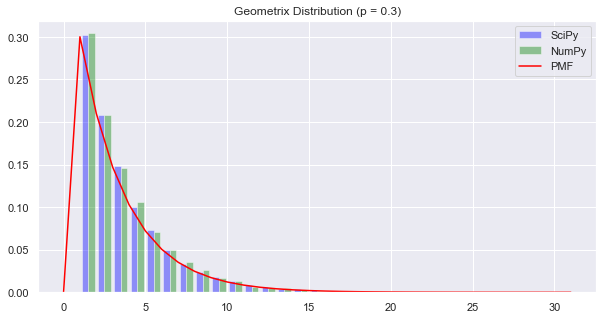

In [18]:
# 確率変数 x を渡すことで, それぞれに対応する確率質量関数の値を取得できる.
rvs_max = max(rvs.max(), rvs_numpy.max())
x = np.arange(0, rvs_max + 5, 1)
y = geom.pmf(x, p=p)

# 擬似乱数によるヒストグラムと確率質量関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PMF", color="red")
ax1.legend()
ax1.set_title(f"Geometrix Distribution (p = {p})")

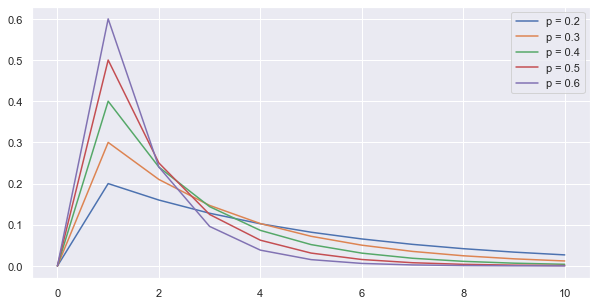

In [19]:
# p を動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

ps = [0.20, 0.30, 0.40, 0.50, 0.60]
x = np.arange(0, 11, 1)
for p in ps:
    y = geom.pmf(x, p=p)
    label = f"p = {p}"
    ax2.plot(x, y, label=label)

ax2.legend()

#### ユースケース
 
- 1年について確率 $p$ で起こる災害が $x$ 年以内に発生する分布として捕捉.

### 例 2.5 (負の二項分布)

　**負の二項分布** (negative binomial distribution) は幾何分布を一般化されたものであり, $n$ 回目の成功を得るまでの失敗の回数を $x$ とした時の確率分布である.

#### 確率質量関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$x = 0, 1, \cdots$ とする. 

$$
    f(x) = {}_{n+x-1}{\rm C}_{x} p^n q^x
$$

</div>

$n=1$ の時に幾何分布となる. ちなみに, 二項分布で二項係数に負も認めれば負の二項分布が求められるため, この名称となっている.  
　ここで[離散型の確率分布の性質](discrete-distribution)を確認する.  

　確率質量関数の定義から $f(x) \geq 0$ であることは自明. また確率質量関数の和が 1 となることについては, 負の二項展開式について考えるとすぐに導出できる. $n \in \mathbb{N}$, $r$ $(0 \leq r \leq n, r \in \mathbb{N})$ として

$$
    (1 + t)^{-n} = \sum_{x=0}^{n}{{}_{-n}{\rm C}_{x}t^x}
$$

とかけ,

$$
    {}_{-n}{\rm C}_{x} = (-1)^x {}_{n+x-1}{\rm C}_{x}
$$

と表せる.
　$t = -(1-p)$ として
 
$$
    \frac{1}{p^n} = {1 -(1-p)}^{-n} = \sum_{x=0}^{\infty}{{}_{-n}{\rm C}_{x}(-(1-p))^x} = \sum_{x=0}^{\infty}{{}_{n+x-1}{\rm C}_{x}(1-p)^x}
$$

となるので, $q = 1 - p$ であり上式に $p^n$ をかけて

$$
    \sum_{x=0}^{\infty}{{}_{n+x-1}{\rm C}_{x}p^n q^x} = 1
$$

となる.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{nq}{p} \\
        & {\rm Var}(X) = \frac{nq}{p^2}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \sum_{x=0}^{\infty}{x {}_{ n+x-1 }{\rm C}_{ x } p^n q^x } \\
                   &= \sum_{x=1}^{\infty}{x \frac{ (n+x-1)! }{ (n-1)! x! } p^n q^x } \\
                   &= \sum_{x=1}^{\infty}{ \frac{ (n+x-1)! }{ (n-1)! (x-1)! } p^n q^x }
    \end{align}
$$

ここで $y = x - 1$, $N = n + 1$ と置換すると

$$
    \begin{align}
        {\rm E}(X) &= \sum_{y=0}^{\infty}{ \frac{ (y + N -1)! }{ ( N-2 )! y! } p^{ N-1 } q^{ y+1 } } \\
                   &= \frac{ q }{ p }(N-1) \sum_{y=0}^{\infty}{ \frac{ (y + N -1 )! }{ ( N-1 )! y! } p^{ N } q^{ y } } \\
                   &= \frac{ q }{ p }(N-1) \\
                   &= \frac{nq}{p}
    \end{align}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)+X) - ({\rm E}(X))^2 \\
                     &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2
    \end{align}
$$

第 2 式から弟 3 式への変換は[期待値の4番目の性質](expectation-property)を用いている.  
　${\rm}E(X(X-1))$ を求めれば分散が求められるので,

$$
    \begin{align}
        {\rm E}(X(X-1)) &= \sum_{x=0}^{\infty}{ x(x-1) {}_{ n+x-1 }{\rm C}_{ x } p^n q^x } \\
                        &= \sum_{x=1}^{\infty}{ x(x-1) \frac{ (n+x-1)! }{ (n-1)! x! } p^n q^x } \\
                        &= \sum_{x=2}^{\infty}{ \frac{ (n+x-1)! }{ (n-1)! (x-2)! } p^n q^x }
    \end{align}
$$

となる. ここで $y = x - 2$, $N = n + 2$ と置換すると

$$
    \begin{align}
        {\rm E}(X(X-1)) &= \sum_{y=0}^{\infty}{ \frac{ (N + y - 1)! }{ (N - 3)! y! } p^{N - 2} q^{y + 2} } \\
                        &= \frac{q^2}{p^2}(N-1)(N-2) \sum_{y=0}^{\infty}{ \frac{ (N+y-1)! }{ (N-1)! y! } p^{N} q^{y} } \\
                        &= \frac{q^2}{p^2}(N-1)(N-2) \\
                        &= \frac{q^2}{p^2}n(n + 1)
    \end{align}
$$

となり分散は

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X(X-1)) + {\rm}E(X) - ({\rm E}(X))^2 \\
                     &= \frac{q^2}{p^2}n(n + 1) + \frac{nq}{p} - \frac{n^2 q^2}{p^2} \\
                     &= \frac{nq}{p^2}
    \end{align}
$$

と分かる.

(python-example-nbinom)=

#### Python での確認

- [SciPy ( `scipy.stats.nbinom` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom)
    - `n` : 成功回数 $n$.
    - `p` : 成功確率 $p$.
- [NumPy ( `numpy.random.Generator.negative_binomial` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.negative_binomial.html)
    - `n` : 成功回数 $n$.
    - `p` : 成功確率 $p$.


In [20]:
# 成功確率 p = 0.20 の事象において n = 4 回成功するまでの失敗回数に関する負の二項分布に従った疑似乱数を size = 10000 だけ生成する.
n = 4
p = 0.20
size = 10000

# SciPy
rvs = nbinom.rvs(n=n, p=p, size=size)
print("> SciPy")
print(rvs[0:100])

# NumPy
rvs_numpy = rng.negative_binomial(n=n, p=p, size=size)
print("> NumPy")
print(rvs_numpy[0:100])

> SciPy
[ 9 40 11 13 26 17 32 22 19 17 20 19 16 28 19 13 25  7  8  6 40 17 13  7
  7  9 10  4 21  9  6 20 12 36 14 36 26 35 29 17 21 18 12  9 12 19 23 13
 17  7 12  8 17  6 24 23 20 27  6 16 30 22  2 15 28 26 17 16 19 16  8 11
 10 40 25 10 29 18 18 14  2 11  9 17 11  6 15 12 18  9  4  9 18 15  5 21
 26 11 12  5]
> NumPy
[19 34 25  3  8 16 18 12 44 10  5 26 11 16 28 12  6 14  6 19 23 14  3 23
 22 15 16 14 10 29  6 20 16  5 25  5 10 10 21  9  9 21 25 29 13 22  4 21
  6 15 22 12 18 17 18 14 33 12  6 25 38 17 15  2 16 14 20  3 10  8 19 14
 33 14  5 16 62 22 16 53 10 43 23 34 17 12  8  3 17 19 12  0 19 38 12 24
 10 13  9  6]


In [21]:
# 負の二項分布の場合は NumPy の乱理想値からやや離れている.
# 期待値・分散の理論値
exp_true = nbinom.mean(n=n, p=p)
var_true = nbinom.var(n=n, p=p)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs｜ {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 15.9776 vs｜ 16.0
分散(乱数 vs 真値): 81.51349823999999 vs 79.99999999999999
> NumPy
期待値(乱数 vs 真値): 16.0454 vs 16.0
分散(乱数 vs 真値): 82.54973884 vs 79.99999999999999


Text(0.5, 1.0, 'Negative Binomial Distribution (n = 4, p = 0.2)')

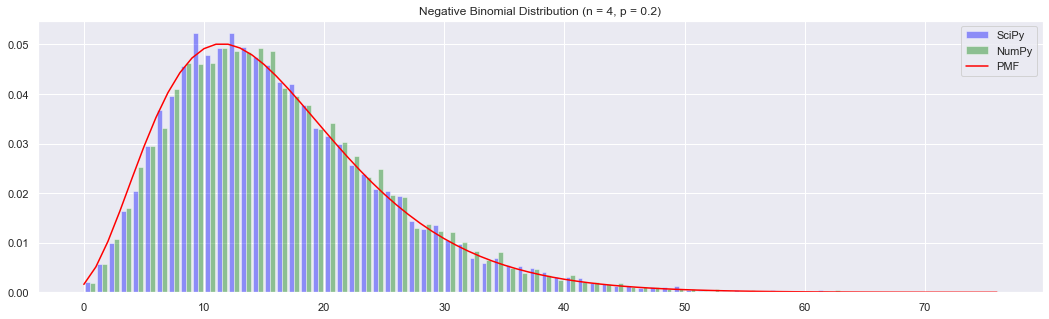

In [22]:
# 確率変数 x を渡すことで, それぞれに対応する確率質量関数の値を取得できる.
rvs_max = max(rvs.max(), rvs_numpy.max())
x = np.arange(0, rvs_max + 5, 1)
y = nbinom.pmf(x, n=n, p=p)

# 擬似乱数によるヒストグラムと確率質量関数の値を図示.
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PMF", color="red")
ax1.legend()
ax1.set_title(f"Negative Binomial Distribution (n = {n}, p = {p})")

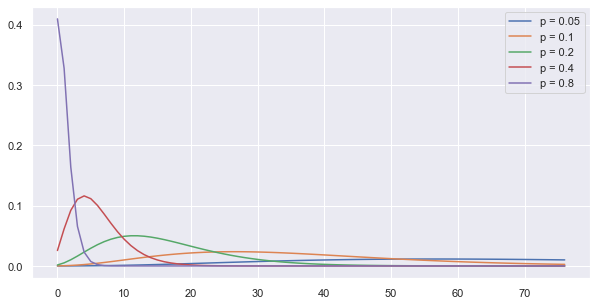

In [23]:
# n = 4 で固定し p のみを動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

ps = [0.05, 0.10, 0.20, 0.40, 0.80]
for p in ps:
    y = nbinom.pmf(x, n=n, p=p)
    label = f"p = {p}"
    ax2.plot(x, y, label=label)

ax2.legend()

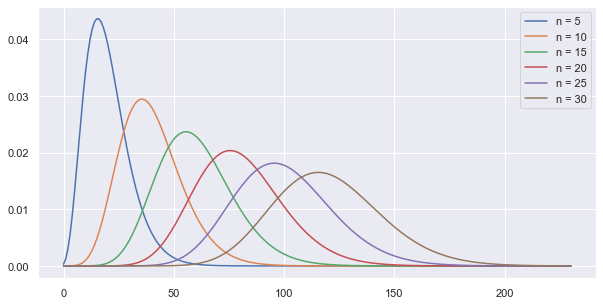

In [24]:
# p = 0.2 で固定し n のみを動かした時の波形の違い.
p = 0.2

fig = plt.figure(figsize=(10, 5))
ax3 = fig.add_subplot(111)

ns = [5, 10, 15, 20, 25, 30]

# x 軸設定
# ns 最大の時の乱数を生成し, その最大値をもとに x 軸の行列を作成.
x = np.arange(0, nbinom.rvs(n=max(ns), p=p, size=size).max() + 1, 1)

for n in ns:
    y = nbinom.pmf(x, n=n, p=p)
    label = f"n = {n}"
    ax3.plot(x, y, label=label)

ax3.legend()

#### ユースケース

- 購入頻度が負の二項分布に従う ([購買回数の分布と負の二項分布の関係](https://qiita.com/nijigen_plot/items/9570487b73ad01fff36b)).


## 3. 連続型の確率分布

### 例 3.1 (一様分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**一様分布** (uniform distribution) は $a < b$ とした時に以下の確率密度関数で表現される確率分布のことを指す.

$$
    \begin{align}
        f(x) = \begin{cases}
            \dfrac{1}{b-a} & (a \leq x \leq b) \\
            0             & (x < a, b < x)
        \end{cases}
    \end{align}
$$

</div>

　ここで[連続型の確率分布の性質](continuous-distribution)を確認する.  
　確率密度関数の定義から $f(x) \geq 0$ であることは自明. また, 以下の計算から

$$
    \begin{align}
        \int_{- \infty}^{\infty}{f(x)dx} &= \int_{- \infty}^{a}{0 \cdot dx} + \int_{- \infty}^{\infty}{\frac{dx}{b-a}} + \int_{b}^{\infty}{0 \cdot dx} \\
                                         &= \biggl[ \frac{x}{b-a} \biggr]_{a}^{b} \\
                                         &= \frac{b}{b-a} - \frac{a}{b-a} = 1.
    \end{align}
$$


#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{a + b}{2} \\
        & {\rm Var}(X) = \frac{(b-a)^2}{12}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \int_{ a }^{ b }{ \frac{x}{b-a}dx } \\
                   &= \biggl[ \frac{x^2}{2(b-a)} \biggr]_{a}^{b} \\
                   &= \frac{1}{2(b-a)}(b^2 - a^2) \\
                   &= \frac{(b+a)(b-a)}{2(b-a)} = \frac{a + b}{2}
    \end{align}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めればよい.

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{ a }^{ b }{ \frac{x^2}{b-a}dx } \\
                   &= \biggl[ \frac{x^x}{3(b-a)} \biggr]_{a}^{b} \\
                   &= \frac{1}{x(b-a)}(b^3 - a^3) \\
                   &= \frac{(b^2 + ab + a^2)(b-a)()}{3(b-a)} = \frac{a^2 + ab + b^2}{3}
    \end{align}
$$

よって

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= \frac{a^2 + ab + b^2}{3} - \frac{(a + b)^2}{4} \\
                     &= \frac{(b-a)^2}{12}
    \end{align}
$$


(python-example-uniform)=
#### Python での確認

- [SciPy ( `scipy.stats.uniform` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform)
    - `loc` : $a$
    - `scale` : $b - a$
- [NumPy ( `numpy.random.Generator.uniform` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html)
    - `low` : $a$
    - `high` : $b$


In [25]:
# 区間 [3, 8] に関する一様分布に従った疑似乱数を size = 10000 だけ生成.
a = 3
b = 8

loc = a
scale = b - a
low = a
high = b
size = 10000

# SciPy
rvs = uniform.rvs(loc=loc, scale=scale, size=size)
print("> SciPy")
print(rvs[0:20])

# NumPy
rvs_numpy = rng.uniform(low=low, high=high, size=size)
print("> NumPy")
print(rvs_numpy[0:20])

> SciPy
[7.88274063 5.19390142 4.37338883 7.89509611 6.73822557 5.50118917
 7.7657495  4.00328955 6.66678994 6.79466314 5.52549956 3.2014981
 4.42434752 7.90444796 4.4331134  4.62651671 5.24272433 4.97227279
 5.07173126 5.262496  ]
> NumPy
[7.22090427 4.98426609 7.55452031 3.1926514  6.32169067 4.0104301
 7.9795091  4.4106398  7.99999312 3.92861151 6.61590431 5.92276641
 5.46060353 7.87279737 5.88647738 3.32982649 4.38343301 3.95296044
 7.59929556 7.11639124]


In [26]:
# 期待値・分散の理論値
exp_true = uniform.mean(loc=loc, scale=scale)
var_true = uniform.var(loc=loc, scale=scale)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs｜ {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 5.48624456573753 vs｜ 5.5
分散(乱数 vs 真値): 2.061522127067692 vs 2.083333333333333
> NumPy
期待値(乱数 vs 真値): 5.500166337412839 vs 5.5
分散(乱数 vs 真値): 2.0828626544358886 vs 2.083333333333333


Text(0.5, 1.0, 'Uniform Distribution [3, 8]')

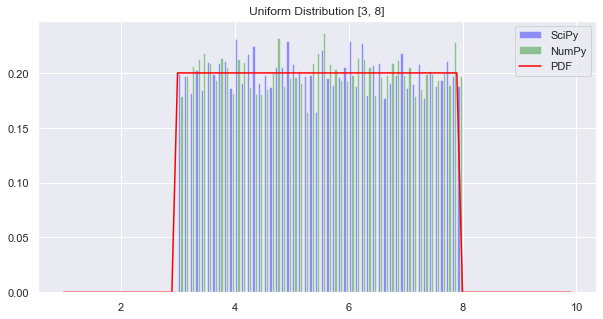

In [27]:
# 確率変数 x を渡すことで, それぞれに対応する確率密度関数の値を取得できる.
rvs_max = max(rvs.max(), rvs_numpy.max())
rvs_min = min(rvs.min(), rvs_numpy.min())
x = np.arange(rvs_min - 2, rvs_max + 2, 0.1)
y = uniform.pdf(x, loc=loc, scale=scale)

# 擬似乱数によるヒストグラムと確率密度関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PDF", color="red")
ax1.legend()
ax1.set_title(f"Uniform Distribution [{a}, {b}]")

#### ユースケース

- 一様分布の擬似乱数をもとに他の分布の擬似乱数を生成
- モンテカルロシミュレーションの初期値として一様分布疑似乱数を使用


(normal-distribution)=
### 例 3.2 (正規分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**正規分布** (normal distribution, ガウス分布 \<Gaussian distribution\>ともいう) はパラメータ $\mu \geq 0, \sigma \gt 0$ を用いて以下の確率密度関数をもつ分布. 後ほど証明するが, $\mu$ は期待値, $\sigma^2$ は分散となる. 

$$
    f(x) = \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) }
$$

</div>

　ここで[連続型の確率分布の性質](continuous-distribution)を確認する.  
　確率密度関数の定義から $f(x) \geq 0$ であることは自明. また, $y = x - \mu$ とすると, $dy = dx$ で以下の計算のようになる.

$$
    \begin{align}
        \int_{- \infty}^{\infty}{f(x)dx} &= \frac{1}{\sqrt{2\pi} \sigma} \int_{- \infty}^{ \infty }{ \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) } dx} \\
                                         &= \frac{1}{\sqrt{2\pi} \sigma} \underline{ \int_{- \infty}^{ \infty }{ \exp{ \biggl( - \frac{ y^2 }{2 \sigma^2} \biggr) } dy} } \\
                                         &= \frac{1}{\sqrt{2\pi} \sigma} \cdot \sqrt{2\pi} \sigma \\
                                         &= 1.
    \end{align}
$$

上記の下線部分は以下の[ガウス積分](gaussian-integral)の結果を利用している.


#### 命題 3.2.1 (ガウス積分)


<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

(gaussian-integral)=
$$
    \begin{align}
        I = \int_{- \infty}^{\infty}{ e^{-ax^2}dx } &= \sqrt{\frac{\pi}{a}} \quad (a > 0)
    \end{align}
$$

</div>

<u>証明</u>

これは以下の計算から分かる.

$$
    \begin{align}
        I^2 &= \int_{- \infty}^{\infty}{ e^{-ax^2}dx } \int_{- \infty}^{\infty}{ e^{-ay^2}dy } \\
            &= \int_{- \infty}^{\infty}{ \int_{- \infty}^{\infty}{ e^{ -a(x^2 + y^2) }dxdy } }
    \end{align}
$$

ここで $x = r\cos {\theta}$, $y = r\sin {\theta}$ と置換すると, ヤコビアンは $r$ より $dxdy = rdrd\theta$ で, $\theta: 0 \rightarrow 2\pi$, $r: 0 \rightarrow \infty$ より

$$
    \begin{align}
        I^2 &= \int_{ 0 }^{ \infty }{ \int_{ 0 }^{ 2\pi }{ e^{ -ar^2 }rdrd\theta } } \\
            &= 2 \pi \int_{ 0 }^{ \infty }{ e^{ -ar^2 }rdr  } \\
            &= 2 \pi \biggl[ \frac{e^{-ar^2}}{-2a} \biggr]_{0}^{\infty} = \frac{\pi}{a}
    \end{align}
$$

よって, 

$$
    \begin{align}
        I = \sqrt{\frac{\pi}{a}} \quad
    \end{align}
$$

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \mu \\
        & {\rm Var}(X) = \sigma^2
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \int_{ -\infty }^{ \infty }{ x \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) }dx } \\
                   &= \int_{ -\infty }^{ \infty }{ \frac{1}{\sqrt{2\pi} \sigma} (\sigma y + \mu) \exp{ \biggl( - \frac{ y^2 }{2} \biggr) } \sigma dy } \quad (x-\mu=\sigma y) \\
                   &= \frac{\sigma}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ y \exp{\biggl( -\frac{y^2}{2} \biggr)} dy } + \frac{\mu}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ \exp{\biggl( -\frac{y^2}{2} \biggr)} dy } \\
                   &= \frac{\mu}{\sqrt{2 \pi}} \cdot \sqrt{2 \pi} = \mu
    \end{align}
$$

と求められる. 第 1 項は奇関数のため 0 となる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めればよい.

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{ -\infty }^{ \infty }{ x^2 \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) }dx } \\
                     &= \frac{\sigma}{\sqrt{2 \pi} \sigma} \int_{ -\infty }^{ \infty }{ (\sigma y + \mu)^2 \exp{ \biggl( - \frac{y^2}{2} \biggr) }\sigma dy } \quad (x-\mu=\sigma y) \\
                     &= \frac{1}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ (\sigma^2 y^2 + 2 \sigma \mu y +  \mu^2) \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } \\
                     &= \frac{\sigma^2}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ y^2 \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } + \frac{\mu^2}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } \quad (\text{奇関数については0}) \\
                     &= \frac{\sigma^2}{\sqrt{2 \pi}} \biggl\{ \biggl[ -yr^{\frac{-y^2}{2}}\biggr]_{-\infty}^{\infty} + \int_{ -\infty }^{ \infty }{ \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } \biggr\} + \frac{\mu^2}{\sqrt{2 \pi}} \int_{ -\infty }^{ \infty }{ \exp{ \biggl( - \frac{y^2}{2} \biggr) } dy } \quad (\text{第1項は部分積分}) \\
                     &= \frac{\sigma^2}{\sqrt{2 \pi}} (0 + \sqrt{2 \pi}) + \frac{\mu^2}{\sqrt{2 \pi}} \cdot \sqrt{2 \pi} = \sigma^2 + \mu^2
    \end{align}
$$

よって

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= \sigma^2 + \mu^2 - \mu^2 \\
                     &= \sigma^2
    \end{align}
$$


(python-example-normal)=
#### Python での確認

- [SciPy ( `scipy.stats.norm` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)
    - `loc` : 期待値 $\mu$.
    - `scale` : 標準偏差 $\sigma$.
- [NumPy ( `numpy.random.Generator.normmal` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html)
    - `loc` : 期待値 $\mu$.
    - `scale` : 標準偏差 $\sigma$.

In [28]:
# loc = 10, scale = 2 に関する正規分布に従った疑似乱数を size = 10000 だけ生成する.
loc = 10
scale = 2
size = 10000

# SciPy
rvs = norm.rvs(loc=loc, scale=scale, size=size)
print("> SciPy")
print(rvs[0:20])

# NumPy
rvs_numpy = rng.normal(loc=loc, scale=scale, size=size)
print("> NumPy")
print(rvs_numpy[0:20])

> SciPy
[ 8.44436023  7.54671223  8.4936667   8.79445249  7.11342596 10.64704268
  9.81667432  7.9919962   9.30355518 13.64885789  7.98472866  9.53846495
  9.00717281 11.06020601 10.61980793  9.67304051  7.58998157  9.26219607
  7.89039827  5.89715244]
> NumPy
[ 8.70461874 11.39812729  8.50115066 10.33695154 10.55931471  9.32878914
  9.00163263 13.17880852 10.83535446 13.12140641  9.68146009  7.14082452
 11.13919738 10.15912164 10.97671707  9.2598795   8.10412987 10.77052253
  9.94839874  7.1912721 ]


In [29]:
# 期待値・分散の理論値
exp_true = norm.mean(loc=loc, scale=scale)
var_true = norm.var(loc=loc, scale=scale)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 9.99171047682664 vs 10.0
分散(乱数 vs 真値): 4.041466309688086 vs 4.0
> NumPy
期待値(乱数 vs 真値): 10.022351940478329 vs 10.0
分散(乱数 vs 真値): 3.992217287294061 vs 4.0


Text(0.5, 1.0, 'Normal Distribution N(10, 4)')

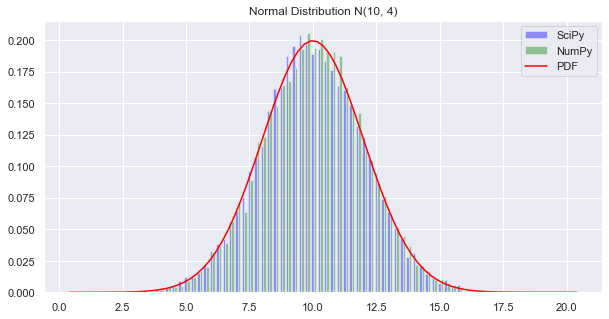

In [30]:
# 確率変数 x を渡すことで, それぞれに対応する確率密度関数の値を取得できる.
rvs_max = max(rvs.max(), rvs_numpy.max())
rvs_min = min(rvs.min(), rvs_numpy.min())
x = np.arange(rvs_min - 2, rvs_max + 2, 0.25)
y = norm.pdf(x, loc=loc, scale=scale)

# 擬似乱数によるヒストグラムと確率密度関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PDF", color="red")
ax1.legend()
ax1.set_title(f"Normal Distribution N({loc}, {scale**2})")

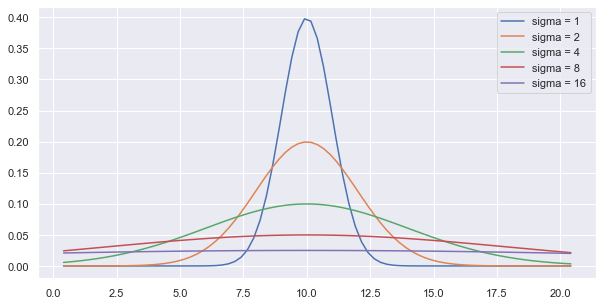

In [31]:
# loc = 10 で固定し scale のみを動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

loc = 10
scales = [1, 2, 4, 8, 16]
for scale in scales:
    y = norm.pdf(x, loc=loc, scale=scale)
    label = f"sigma = {scale}"
    ax2.plot(x, y, label=label)

ax2.legend()

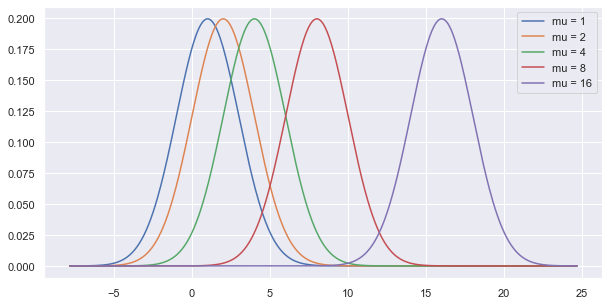

In [32]:
# scale = 2 で固定し loc のみを動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax3 = fig.add_subplot(111)

locs = [1, 2, 4, 8, 16]
scale = 2
x = np.arange(
    norm.rvs(loc=min(locs), scale=scale, size=size).min() - 1,
    norm.rvs(loc=max(locs), scale=scale, size=size).max() + 1,
    0.05,
)
for loc in locs:
    y = norm.pdf(x, loc=loc, scale=scale)
    label = f"mu = {loc}"
    ax3.plot(x, y, label=label)

ax3.legend()

#### ユースケース

- 工事中


#### 定理 3.2.2 (中心極限定理)

　**中心極限定理** (central limit theorem) とは, いかなる確率分布でもその母集団から取り出した標本の平均値の分布は, 平均を計算する回数が大きくなるにつれて正規分布に近づくという定理. これを数学的に表現すると以下のように書ける.

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　平均 $\mu$, 分散 $\sigma^2$ の独立同分布の確率変数 $X_1, X_2, \cdots$ に対して, $\overline{X}(n) = \frac{1}{n} \sum_{i=1}^{n}{X_i}$ とおくと以下が成立する.

$$
    \lim_{n \rightarrow \infty} {P \biggl(a \leq \frac{\overline{X}(n) - \mu}{\sigma / \sqrt{n}} \leq b \biggr)} = \int_{a}^{b}{ \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}} dx }
$$

</div>

<u>証明</u>

$Y(n)$ を以下のように定義する.

$$
    Y(n) = \frac{\overline{X}(n) - \mu}{\sigma / \sqrt{n}}
$$

この時, $Y(n)$ の積率母関数が $N(0,1)$ の積率母関数に収束することを示せばよい.

$$
    \begin{align}
        Y(n) &= \frac{n\overline{X}(n) - n\mu}{\sigma \sqrt{n}} \\
             &= \frac{ \sum_{i=1}^{n}{X_i} - \sum_{i=1}^{n}{\mu} }{\sigma \sqrt{n}} \\
             &= \frac{1}{\sqrt{n}} \sum_{i=1}^{n}{ \frac{ X_i - \mu }{\sigma} }
    \end{align}
$$

となるので, ここで確率変数 $Z_i = \dfrac{X_i - \mu}{\sigma}$ を導入すると, $Z_i$ は次の性質を示す.

$$
    Y(n) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n}{ Z_i } \quad {\rm E}(Z_i) = 0, \quad {\rm Var}(Z_i) = 1
$$

$Y(n)$ の積率母関数 $M_{Y(n)}(t)$ は,

$$
    \begin{align}
        M_{Y(n)}(t) &= {\rm E}( \exp{ [ tY(n) ] } ) \\
                    &= {\rm E}\biggl( \exp{ \biggl[ \frac{t}{\sqrt{n}} \sum_{i=1}^{n}{ Z_i } \biggr] } \biggr) \\
                    &= {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_1}} \times e^{\frac{t}{n}\sqrt{Z_2}} \times \cdots \times e^{\frac{t}{n}\sqrt{Z_n}} \bigr)
    \end{align}
$$

$X_1, X_2, \cdots$ は互いに独立であり, その確率変数から定義された $Z_1, Z_2, \cdots$ も互いに独立である. ゆえに上式は

$$
    \begin{align}
        M_{Y(n)}(t) &= {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_1}} \times e^{\frac{t}{n}\sqrt{Z_2}} \times \cdots \times e^{\frac{t}{n}\sqrt{Z_n}} \bigr) \\
                    &= {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_1}} \bigr) \times {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_2}} \bigr) \times \cdots \times {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_n}} \bigr)
    \end{align}
$$

となる. また, $X_1, X_2, \cdots$ は同じ確率分布であり, その確率変数から定義された $Z_1, Z_2, \cdots$ も同じ確率分布なので上式はさらに

$$
    \begin{align}
        M_{Y(n)}(t) &= \Bigl( {\rm E}\bigl( e^{\frac{t}{n}\sqrt{Z_1}} \bigr) \Bigr)^n \\
                    &= \biggl( M_{Z_1} \biggl( \frac{t}{\sqrt{n}} \biggr) \biggr)^n \label{☆}\tag{☆}
    \end{align}
$$

となり, $Z$ の積率母関数の冪乗で表現できる. $M_{Z_1}(t)$ に対してマクローリン展開を適応する.

$$
    M_{Z_1}(t) = M_{Z_1}(0) + \left.\frac{dM_{Z_1}(t)}{dt}\right|_{t=0} t + \left.\frac{1}{2}\frac{d^2M_{Z_1}(t)}{dt^2}\right|_{t=0} t^2 + O(t^3)
$$

ここで, 

$$
    M_{Z_1}(0) = 1, \quad
    \left.\frac{dM_{Z_1}(t)}{dt}\right|_{t=0} = \mu_1 = {\rm E}(Z_1) = 0, \quad
    \left.\frac{1}{2}\frac{d^2M_{Z_1}(t)}{dt^2}\right|_{t=0} = \mu_2 = {\rm E}(X^2) = 1
$$

より $M_{Z_1}(t) = 1 + \dfrac{t^2}{2} + O(t^3)$ である. よって

$$
    M_{Z_1} \biggl( \frac{t}{\sqrt{n}} \biggr) = 1 + \frac{t^2}{2n} + O \biggl( \biggl( \frac{t}{\sqrt{n}} \biggr)^3 \biggr)
$$

なので, 式 $(\ref{☆})$ に代入すれば

$$
    M_{Y_(n)} (t) = \biggl( 1 + \frac{t^2}{2n} + O \biggl( \biggl( \frac{t}{\sqrt{n}} \biggr)^3 \biggr) \biggr)^n.
$$

よって

$$
    \lim_{n \rightarrow \infty}{M_{Y_(n)} (t)} = \lim_{n \rightarrow \infty}{ \biggl( 1 + \frac{t^2}{2n}  \biggr)^n } = e^{\frac{1}{2}t^2}
$$

これは $N(0,1)$ の積率母関数と一致する.

　python で中心極限定理を確認してみる.

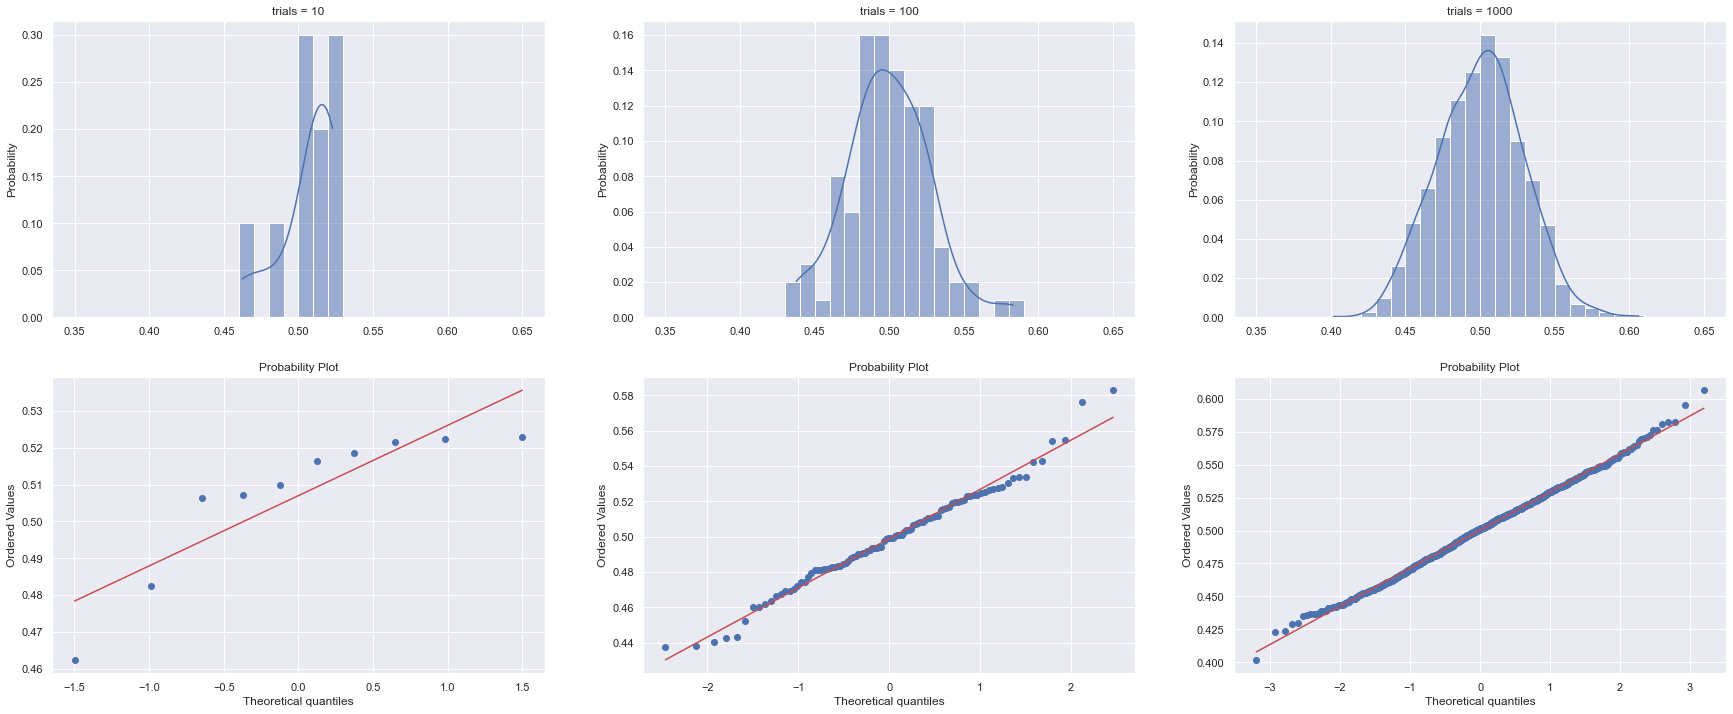

In [33]:
# ----------------------------------------------------------------------------------
# 一様分布に従う標本平均のサイズ数を増やすことで, 標本平均が正規分布に従うことの確認
#
# ** 1回の試行においてサンプル数を size で定義
# ** 標本平均のサイズ数については trials_list で徐々に増加
# ----------------------------------------------------------------------------------

import scipy.stats as st

# 図の定義
fig = plt.figure(figsize=(30, 12))

# x軸の定義
x = np.arange(0.35, 0.65, 0.01)

# 擬似乱数生成
size = 100
trials_list = [10, 100, 1000]
rng = np.random.default_rng()
j = 1
for trials in trials_list:
    means = np.zeros(trials)
    for i in range(trials):
        rvs = rng.uniform(size=size)
        means[i] = rvs.mean()

    # 一様分布から抽出したサンプル平均を trials 回だけドローしたもののヒストグラム.
    ax1 = fig.add_subplot(2, 3, j)
    sns.histplot(
        means, bins=x, stat="probability", kde=True, label="random variables", ax=ax1
    )
    title = f"trials = {trials}"
    ax1.set_title(title)

    # 正規性を確認するための Q-Q プロット.
    ax1 = fig.add_subplot(2, 3, j + 3)
    st.probplot(means, plot=plt)

    j += 1

### 例 3.3 (対数正規分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$\log{X} \sim N(\mu, \sigma^2)$ の時に元の $X (>0)$ は**対数正規分布** (log-normal distribution) に従うといい, 確率密度関数は以下のように表現できる.

$$
    \begin{align}
        f(x) = \frac{1}{\sqrt{2 \pi} \sigma x} \exp{ \biggl( - \frac{ (\log {x} -\mu)^2 }{ 2 \sigma^2 } \biggr) }
    \end{align}
$$

</div>

　これは [例 4.2 (正規分布と対数正規分布)](exmaple-normal-lognormal) でも説明したように, $y = \log(x)$ として $y \sim N(\mu, \sigma^2)$ の場合に上式の密度関数が得られる.  
　ここで[連続型の確率分布の性質](continuous-distribution)を確認する. 確率密度関数の定義から $f(x) \geq 0$ であることは自明. また, $y = \log{x} \Leftrightarrow x = e^y$ として,

$$
    \begin{align}
        \int_{ 0 }^{ \infty }{ \frac{1}{\sqrt{2\pi} \sigma x} \exp{ \biggl( - \frac{( \log{x} -\mu)^2}{2 \sigma^2} \biggr) } dx} 
            &= \int_{ -\infty }^{ \infty }{ \frac{1}{\sqrt{2\pi} \sigma e^y} \exp{ \biggl( - \frac{( y -\mu)^2}{2 \sigma^2} \biggr) } e^y dy} \\
            &= \int_{ -\infty }^{ \infty }{ \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{( y -\mu)^2}{2 \sigma^2} \biggr) } dy}
    \end{align}
$$

となり正規分布と同じ式なので 1 となる.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \exp{ \biggl( \mu + \frac{\sigma^2}{2} \biggr) } \\
        & {\rm Var}(X) = \exp{ ( 2\mu + 2\sigma^2) } - \exp{ ( 2\mu + \sigma^2) }
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)と $y = \log{x} \Leftrightarrow x = e^y$ で $dx = e^y dy$ より

$$
    \begin{align}
        {\rm E}(X) &= \int_{0}^{\infty}{ x \frac{1}{\sqrt{2 \pi} \sigma x} \exp{ \biggl( - \frac{ (\log {x} -\mu)^2 }{ 2 \sigma^2 } \biggr) } dx } \\
                   &= \int_{-\infty}^{\infty}{ e^y \frac{1}{\sqrt{2 \pi} \sigma e^y} \exp{ \biggl( - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } \biggr) } e^y dy } \\
                   &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } + y \biggr) } dy }
    \end{align}
$$

$\exp$ の中身を平方完成すると以下のようになる.

$$
    - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } + y = - \frac{(y - \mu - \sigma^2)^2 }{2 \sigma^2} + \mu + \frac{\sigma^2}{2}
$$

ここで, $t = y - \mu - \sigma^2$ と置換して

$$
    \begin{align}
        {\rm E}(X) &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{(y - \mu - \sigma^2)^2 }{2 \sigma^2} + \mu + \frac{\sigma^2}{2} \biggr) } dy } \\
                   &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{ t^2 }{2 \sigma^2} + \mu + \frac{\sigma^2}{2} \biggr) } dy } \\
                   &= \exp{ \biggl( \mu + \frac{\sigma^2}{2} \biggr) } \underline{\int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{ t^2 }{2 \sigma^2} \biggr) } dt }} \\
                   &= \exp{ \biggl( \mu + \frac{\sigma^2}{2} \biggr) }
    \end{align}
$$

と求められる. 下線部分は [ガウス積分](gaussian-integral) によって計算できる.
 また分散については[分散と期待値の関係式](expect-variance)より

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2
    \end{align}
$$

なので ${\rm}E(X^2)$ を求める.

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{0}^{\infty}{ x^2 \frac{1}{\sqrt{2 \pi} \sigma x} \exp{ \biggl( - \frac{ (\log {x} -\mu)^2 }{ 2 \sigma^2 } \biggr) } dx } \\
                   &= \int_{-\infty}^{\infty}{ e^{2y} \frac{1}{\sqrt{2 \pi} \sigma e^y} \exp{ \biggl( - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } \biggr) } e^y dy } \\
                   &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{ (y -\mu)^2 }{ 2 \sigma^2 } + 2y \biggr) } dy } \\
                   &= \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{(y - \mu - 2 \sigma^2)^2 }{2 \sigma^2} + 2 (\mu + \sigma^2) \biggr) } dy } \\
                   &= \exp{ (2\mu + 2\sigma^2 ) } \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{(y - \mu - 2 \sigma^2)^2 }{2 \sigma^2} \biggr) } dy } \\
                   &= \exp{ (2\mu + 2\sigma^2 ) } \underline{ \int_{-\infty}^{\infty}{ \frac{1}{\sqrt{2 \pi} \sigma } \exp{ \biggl( - \frac{t^2 }{2 \sigma^2} \biggr) } dt } \quad (t = y - \mu - 2\sigma^2) } \\
                   &= \exp{ (2\mu + 2\sigma^2 ) }
    \end{align}
$$

である. 下線部分は [ガウス積分](gaussian-integral) によって計算できる.
よって

$$
    \begin{align}
        {\rm Var}(X) &= {\rm}E(X^2) - ({\rm E}(X))^2 \\
                     &= \exp{ ( 2\mu + 2\sigma^2) } - \exp{ ( 2\mu + \sigma^2) }.
    \end{align}
$$

(python-example-lognormal)=
#### Python での確認

- [SciPy ( `scipy.stats.lognorm` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm)
    - `s` : 元になっている正規分布の標準偏差 $\sigma$.
    - `scale` : 元になっている正規分布の期待値 $\mu$ を用いて $\exp{(\mu)}$ に対応.
- [NumPy ( `numpy.random.Generator.lognormal` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.lognormal.html)
    - `mean` : 元になっている正規分布の期待値 $\mu$.
    - `sigma` : 元になっている正規分布の標準偏差 $\sigma$.


In [34]:
# 元になっている正規分布の平均が 2, 標準偏差が 1 である対数正規分布に従った疑似乱数を size = 10000 だけ生成する.
mean = 2
sigma = 1
s = sigma
scale = np.exp(mean)
size = 10000

# SciPy
rvs = lognorm.rvs(s=s, scale=scale, size=size)
print("> SciPy")
print(rvs[0:20])

# NumPy
rvs_numpy = rng.lognormal(mean=mean, sigma=sigma, size=size)
print("> NumPy")
print(rvs_numpy[0:20])

> SciPy
[12.13866383  3.85809485  1.13307748 13.00734616 27.32722076  8.29409661
  3.79232744 38.62175001  1.26122469 57.54135495 11.55934946 10.89652143
 10.25213307  3.34935422  2.749093    5.21803848 15.43401362 18.33856239
  8.31241737  4.02313134]
> NumPy
[ 1.57850612  7.86265062 27.24900513 30.01665573  7.59093992  1.66620406
  0.22384949  8.9089529   5.80621548 14.80233454  4.22180958  3.49283317
  3.40634783 27.42417903  5.77425999  7.40772832 11.53015226 10.27599268
 17.95171949  3.96510428]


In [35]:
# 期待値・分散の理論値
exp_true = lognorm.mean(s=s, scale=scale)
var_true = lognorm.var(s=s, scale=scale)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 12.126105365724259 vs 12.182493960703473
分散(乱数 vs 真値): 240.58095664047977 vs 255.0156343901585
> NumPy
期待値(乱数 vs 真値): 12.274062231463299 vs 12.182493960703473
分散(乱数 vs 真値): 281.1239279860253 vs 255.0156343901585


Text(0.5, 1.0, 'Log-normal Distribution')

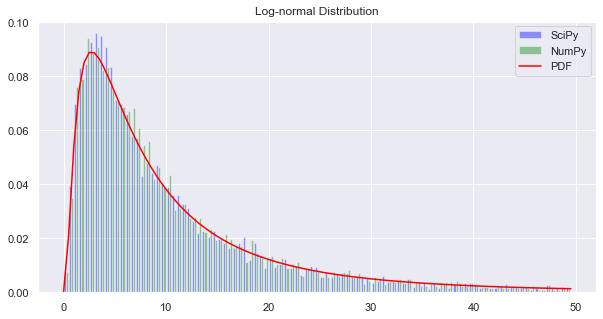

In [36]:
# 確率変数 x を渡すことで, それぞれに対応する確率密度関数の値を取得できる.
x = np.arange(0, 50, 0.5)
y = lognorm.pdf(x, s=s, scale=scale)

# 擬似乱数によるヒストグラムと確率密度関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PDF", color="red")
ax1.legend()
ax1.set_title(f"Log-normal Distribution")

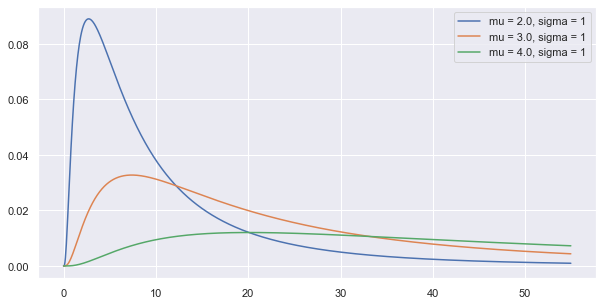

In [37]:
# s = 1 で固定し scale のみを動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

scales = [np.exp(2), np.exp(3), np.exp(4)]
s = 1
x = np.arange(0, 55, 0.05)
for scale in scales:
    y = lognorm.pdf(x, s=s, scale=scale)
    label = f"mu = {round(np.log(scale), 1)}, sigma = {s}"
    ax2.plot(x, y, label=label)

ax2.legend()

#### ユースケース

- 世帯年収


### 例 3.4 (指数分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**指数分布** (exponential distribution) は $\lambda > 0$ として以下の確率密度関数で表現できる. 

$$
    \begin{align}
        f(x) = \begin{cases}
            \lambda e^{-\lambda x}  & (x \geq 0) \\
            0 & (x < 0)
        \end{cases}
    \end{align}
$$

</div>

　ここで[連続型の確率分布の性質](continuous-distribution)を確認する. 確率密度関数の定義から $f(x) \geq 0$ であることは自明. また, 

$$
    \begin{align}
        \int_{0}^{\infty}{\lambda e^{-\lambda x} dx} = \biggl[ -e^{-\lambda x} \biggr]_{0}^{\infty} = 1
    \end{align}
$$


#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{1}{\lambda} \\
        & {\rm Var}(X) = \frac{1}{\lambda^2}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)より

$$
    \begin{align}
        {\rm E}(X) &= \int_{0}^{\infty}{x \lambda e^{-\lambda x} dx } \\
                   &= \biggl[ -xe^{-\lambda x} \biggr]_{0}^{\infty} + \int_{0}^{\infty}{e^{-\lambda x}dx} \\
                   &= \biggl[ -\frac{1}{\lambda} e^{-\lambda x} \biggr]_{0}^{\infty} \\
                   &= \frac{1}{\lambda}
    \end{align}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めればよい. 部分積分を 2 回行うことで計算できる.

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{0}^{\infty}{x^2 \lambda e^{-\lambda x} dx} \\
                     &= \biggl[ -x^2e^{-\lambda x} \biggr]_{0}^{\infty} - \frac{2}{\lambda} \biggl[ -xe^{-\lambda x} \biggr]_{0}^{\infty} + \frac{2}{\lambda} \int_{0}^{\infty}{e^{-\lambda x}dx} \\
                     &= \frac{2}{\lambda}\biggl[ -\frac{1}{\lambda} e^{-\lambda x} \biggr]_{0}^{\infty} \\
                     &= \frac{2}{\lambda^2}
    \end{align}
$$


よって

$$
    \begin{align}
        {\rm Var}(X) = \frac{2}{\lambda^2} - \frac{1}{\lambda^2} = \frac{1}{\lambda^2}.
    \end{align}
$$

(python-example-exponential)=
#### Python での確認

- [SciPy ( `scipy.stats.expon` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)
    - `scale` : $\dfrac{1}{\lambda}$ に対応.
- [NumPy ( `numpy.random.Generator.exponential` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html)
    - `scale` : $\dfrac{1}{\lambda}$ に対応.


In [38]:
# lam = 10 に関する指数分布に従った疑似乱数を size = 10000 だけ生成する.
lam = 10
scale = 1 / lam
size = 10000

# SciPy
rvs = expon.rvs(scale=scale, size=size)
print("> SciPy")
print(rvs[0:20])

# NumPy
rvs_numpy = rng.exponential(scale=scale, size=size)
print("> NumPy")
print(rvs_numpy[0:20])

> SciPy
[0.24686289 0.13531327 0.22418092 0.01216911 0.30217931 0.0787846
 0.20000076 0.20538609 0.02527578 0.12771763 0.04565197 0.0027785
 0.00546102 0.0084852  0.01597925 0.01095163 0.11806845 0.08323819
 0.3485689  0.22997482]
> NumPy
[0.03674343 0.08189654 0.08171052 0.00815086 0.21415771 0.23108241
 0.29555031 0.00074148 0.17720455 0.15297348 0.00212904 0.49895004
 0.07240381 0.12080324 0.00332215 0.29496785 0.00912401 0.02942373
 0.27237057 0.01573751]


In [39]:
# 期待値・分散の理論値
exp_true = expon.mean(scale=scale)
var_true = expon.var(scale=scale)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 0.0988464184143065 vs 0.1
分散(乱数 vs 真値): 0.009734719586634608 vs 0.010000000000000002
> NumPy
期待値(乱数 vs 真値): 0.1014606769292416 vs 0.1
分散(乱数 vs 真値): 0.010172692832039391 vs 0.010000000000000002


Text(0.5, 1.0, 'Exponential Distribution')

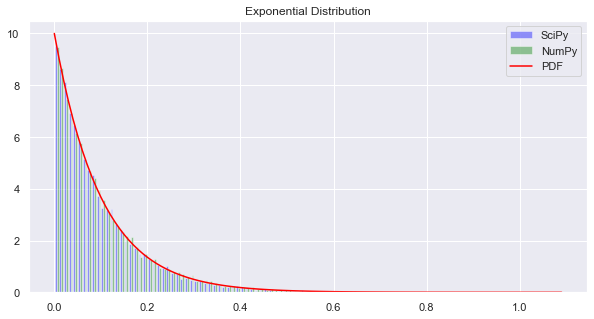

In [40]:
# 確率変数 x を渡すことで, それぞれに対応する確率密度関数の値を取得できる.
rvs_max = max(rvs.max(), rvs_numpy.max())
rvs_min = min(rvs.min(), rvs_numpy.min())
x = np.arange(rvs_min, rvs_max, 0.01)
y = expon.pdf(x, scale=scale)

# 擬似乱数によるヒストグラムと確率密度関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PDF", color="red")
ax1.legend()
ax1.set_title(f"Exponential Distribution")

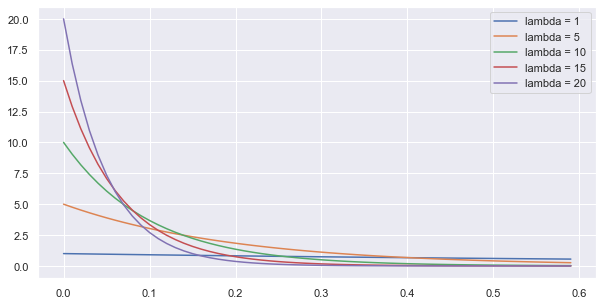

In [41]:
# lambda を動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

lams = [1, 5, 10, 15, 20]
x = np.arange(0, 0.6, 0.01)
for lam in lams:
    scale = 1 / lam
    y = expon.pdf(x, scale=scale)
    label = f"lambda = {lam}"
    ax2.plot(x, y, label=label)

ax2.legend()

#### ユースケース

- 工事中


### 例 3.5 (ガンマ分布)

#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**ガンマ分布** (Gamma distribution) は $\lambda > 0, \alpha > 0$ として以下の確率密度関数で表現できる. 

$$
    \begin{align}
        f(x) = \begin{cases}
            \dfrac{\lambda^\alpha}{\varGamma(\alpha)} x^{\alpha - 1}e^{-\lambda x}  & (x \geq 0) \\
            0 & (x < 0)
        \end{cases}
    \end{align}
$$

ここで $\varGamma(\alpha)$ は以下で定義され**ガンマ関数** という.

$$
    \begin{align}
        \varGamma(\alpha) = \int_{0}^{\infty}{x^{\alpha - 1}e^{-x}dx}
    \end{align}
$$

</div>

　$\alpha = 1$ ならば指数分布になることが分かる.  
　ここで[連続型の確率分布の性質](continuous-distribution)を確認する. 確率密度関数の定義から $f(x) \geq 0$ であることは自明. また合計和が 1 になることは以下についてまず示す.

$$
    \begin{align}
        \int_{0}^{\infty}{x^{\alpha-1}e^{-\lambda x}dx} = \frac{\varGamma(\alpha)}{\lambda^(\alpha)}
    \end{align}
$$

$\lambda x = y$ とすれば $\lambda dx = dy$ より

$$
    \begin{align}
        \int_{0}^{\infty}{x^{\alpha-1}e^{-\lambda x}dx} &= \int_{0}^{\infty}{ \biggl( \frac{y}{\lambda} \biggr) ^{\alpha - 1} e^{-y} \frac{1}{\lambda} dy } \\
                                                        &= \frac{1}{\lambda^\alpha} \int_{0}^{\infty}{y^{\alpha-1}e^{-y}dy} \\
                                                        &= \frac{\varGamma(\alpha)}{\lambda^(\alpha)}
    \end{align}
$$

ゆえに以下のように計算できる.

$$
    \begin{align}
        \int_{0}^{\infty}{ \frac{ \lambda^\alpha }{ \varGamma(\alpha) } x^{\alpha - 1} e^{-\lambda x} dx } 
            &= \frac{\lambda^{\alpha}}{\varGamma(\alpha)} \int_{0}^{\infty}{x^{\alpha-1}e^{-\lambda x}dx} \\
            &= \frac{\lambda^{\alpha}}{\varGamma(\alpha)} \cdot \frac{\varGamma(\alpha)}{\lambda^(\alpha)} \\
            &= 1.
    \end{align}
$$


#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{\alpha}{\lambda} \\
        & {\rm Var}(X) = \frac{\alpha}{\lambda^2}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)と[ガンマ関数の性質](gamma-function)から $\varGamma(\alpha + 1) = \alpha \varGamma(\alpha)$ となることに注意して

$$
    \begin{align}
        {\rm E}(X) &= \int_{0}^{\infty}{ x \frac{\lambda^\alpha}{\varGamma(\alpha)} x^{\alpha - 1}e^{-\lambda x} dx } \\
                   &= \int_{0}^{\infty}{ \frac{\alpha \lambda^\alpha}{\varGamma(\alpha + 1)} x^{\alpha}e^{-\lambda x} dx } \\
                   &= \frac{\alpha}{\lambda} \int_{0}^{\infty}{ \frac{\lambda^{\alpha + 1}}{\varGamma(\alpha + 1)} x^{(\alpha+1)-1}e^{-\lambda x} dx } \\
                   &= \frac{\alpha}{\lambda}
    \end{align}
$$

と求められる. た分散について[分散と期待値の関係式](expect-variance)から ${\rm E}(X^2)$ を求めればよい. [ガンマ関数の性質](gamma-function)から $\varGamma(\alpha + 2) = (\alpha + 1)\varGamma(\alpha + 1) = (\alpha + 1)\alpha \varGamma(\alpha)$ であることより

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{0}^{\infty}{ x^2 \frac{\lambda^\alpha}{\varGamma(\alpha)} x^{\alpha - 1}e^{-\lambda x} dx } \\
                     &= \int_{0}^{\infty}{ \frac{\alpha (\alpha + 1) \lambda^\alpha}{\varGamma(\alpha + 2)} x^{\alpha + 1}e^{-\lambda x} dx } \\
                     &= \frac{\alpha(\alpha + 1)}{\lambda^2} \int_{0}^{\infty}{ \frac{\lambda^{\alpha + 2}}{\varGamma(\alpha + 2)} x^{(\alpha+2)-1}e^{-\lambda x} dx } \\
                     &= \frac{\alpha(\alpha + 1)}{\lambda^2}
    \end{align}
$$


よって

$$
    \begin{align}
        {\rm Var}(X) = \frac{\alpha(\alpha + 1)}{\lambda^2} - \frac{\alpha^2}{\lambda^2} = \frac{\alpha}{\lambda^2}.
    \end{align}
$$

#### 命題 3.5.1 (ガンマ関数の性質)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

(gamma-function)=
$$
    \begin{align}
        & \varGamma(\alpha) = (\alpha - 1)\varGamma(\alpha) \\
        & \varGamma(n + 1) = n! \quad (n \text{は正整数とする}) \\
        & \varGamma \biggl( \frac{1}{2} \biggr) = \sqrt{\pi}
    \end{align}
$$

</div>

<u>証明</u>
　一つ目について部分積分より

$$
    \begin{align}
        \varGamma(\alpha) &= \int_{0}^{\infty}{x^{\alpha-1}e^{-x}dx} \\
                          &= \biggl[ -x^{\alpha-1}e^{-x} \biggr]_{0}^{\infty} + (\alpha - 1) \int_{0}^{\infty}{x^{\alpha-2}x^{-2}dx} \\
                          &= (\alpha - 1) \varGamma(\alpha - 1)
    \end{align}
$$

と求められる. また $\varGamma(1)$ について

$$
    \begin{align}
        \varGamma(1) &= \int_{0}^{\infty}{e^{-x}dx} \\
                     &= \biggl[ -e^{-x} \biggr]_{0}^{\infty} \\
                     &= 1
    \end{align}
$$

なので, $n \in \mathbb{N}$ として

$$
    \begin{align}
        \varGamma(n + 1) &= n \varGamma(n) \\
                         &= n(n-1) \varGamma(n-1) \\
                         &\cdots \\
                         &= n(n-1) \cdots 1 \varGamma(1) \\
                         &= n!
    \end{align}
$$

と分かる. 最後に[ガウス積分](gaussian-integral)を用いて以下のように計算できる.

$$
    \begin{align}
        \varGamma\biggl(\frac{1}{2}\biggr) &= \int_{0}^{\infty}{x^{-\frac{1}{2}}e^{-x}dx} \\
                                           &= \int_{0}^{\infty}{ \frac{e^{-x}}{\sqrt{x}}dx} \\
                                           &= \int_{0}^{\infty}{ \frac{e^{-t^2}}{t}2tdt} \quad (t = \sqrt{x}) \\
                                           &= 2 \int_{0}^{\infty}{e^{-t^2}dt} \\
                                           &= \sqrt{\pi}
    \end{align}
$$

(python-example-gamma)=        
#### Python での確認

- [SciPy ( `scipy.stats.gamma` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)
    - `a`: $\alpha$ に対応.
    - `scale`: $\dfrac{1}{\lambda}$ に対応.
- [NumPy ( `numpy.random.Generator.gamma` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html)
    - `shape`: $\alpha$ に対応.
    - `scale`: $\dfrac{1}{\lambda}$ に対応.


In [42]:
# alpha = 2, lambda = 1 に関するガンマ分布に従った疑似乱数を size = 10000 だけ生成.
alpha = 2
lam = 1
a = shape = alpha
scale = 1 / lam
size = 10000

# SciPy
rvs = gamma.rvs(a=a, scale=scale, size=size)
print("> SciPy")
print(rvs[0:20])

# NumPy
rvs_numpy = rng.gamma(shape=shape, scale=scale, size=size)
print("> NumPy")
print(rvs_numpy[0:20])

> SciPy
[0.14104518 2.70090668 0.28961623 2.68559582 0.93101428 2.74701337
 2.09359863 3.02196069 3.48428827 2.52368587 1.61163526 3.65165301
 0.57318435 2.88677536 2.2471682  0.36205463 0.90254218 1.14723181
 0.13356893 2.18125514]
> NumPy
[0.66654217 0.76793644 0.23092859 0.4690743  3.39361151 1.37850756
 1.81937266 1.70376479 3.96808171 0.58262311 5.53231653 1.20306729
 0.96939212 3.28606086 2.30749076 2.78914968 2.86649464 1.53030685
 4.57444411 1.51354263]


In [43]:
# 期待値・分散の理論値
exp_true = gamma.mean(a, scale=scale)
var_true = gamma.var(a, scale=scale)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 2.018104665793077 vs 2.0
分散(乱数 vs 真値): 1.9902922146294313 vs 2.0
> NumPy
期待値(乱数 vs 真値): 2.0083885511471853 vs 2.0
分散(乱数 vs 真値): 2.0358665146753987 vs 2.0


Text(0.5, 1.0, 'Gamma Distribution')

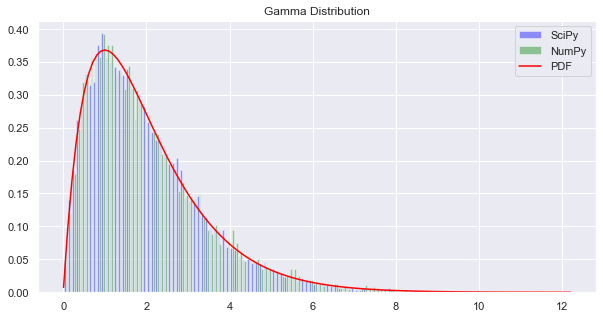

In [44]:
# 確率変数 x を渡すことで, それぞれに対応する確率密度関数の値を取得できる.
rvs_max = max(rvs.max(), rvs_numpy.max())
rvs_min = min(rvs.min(), rvs_numpy.min())
x = np.arange(rvs_min, rvs_max + 1, 0.1)
y = gamma.pdf(x, a=a, scale=scale)

# 擬似乱数によるヒストグラムと確率密度関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PDF", color="red")
ax1.legend()
ax1.set_title(f"Gamma Distribution")

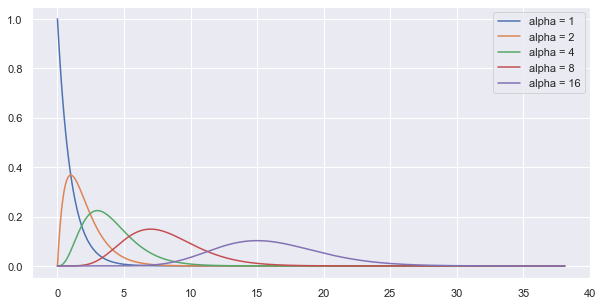

In [45]:
# alpha を動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

alphas = [1, 2, 4, 8, 16]
x = np.arange(0, gamma.rvs(max(alphas), scale=scale, size=size).max() + 1, 0.1)
for alpha in alphas:
    a = alpha
    y = gamma.pdf(x, a, scale=scale)
    label = f"alpha = {a}"
    ax2.plot(x, y, label=label)

ax2.legend()

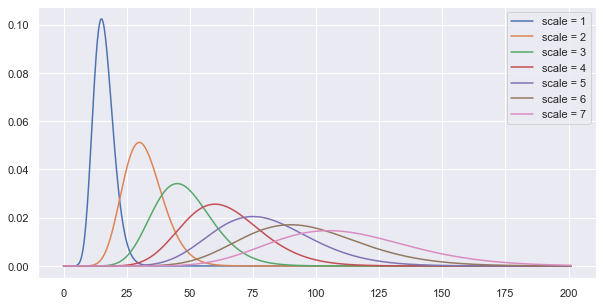

In [46]:
# scale を動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax3 = fig.add_subplot(111)

a = 2
scales = [1, 2, 3, 4, 5, 6, 7]
x = np.arange(0, 200 + 1, 0.1)
for scale in scales:
    a = alpha
    y = gamma.pdf(x, a, scale=scale)
    label = f"scale = {scale}"
    ax3.plot(x, y, label=label)

ax3.legend()

#### ユースケース

- 工事中



### 例 3.6 (ベータ分布)


#### 確率密度関数

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**ベータ分布** (Beta distribution) は $(0, 1)$ 上の確率分布で $\alpha > 0, \beta > 0$ としたときに以下の確率分布で表現できる. 

$$
    \begin{align}
        f(x) = \begin{cases}
            \dfrac{x^{\alpha -1} (1-x)^{\beta - 1}}{ B(\alpha, \beta)}  & (0 < x < 1) \\
            0 & (\text{Otherwise})
        \end{cases}
    \end{align}
$$

ここで $B(\alpha, \beta)$ は以下で定義され**ベータ関数**と呼ぶ.

$$
    \begin{align}
        B(\alpha, \beta) = \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx}
    \end{align}
$$

</div>

　ここで[連続型の確率分布の性質](continuous-distribution)を確認する. 確率密度関数の定義から $f(x) \geq 0$ であることは自明. また合計和が 1 になることについては

$$
    \int_{0}^{1}{ \frac{ x^{\alpha - 1}(1-x)^{\beta - 1} }{B(\alpha, \beta)} dx} = \frac{1}{B(\alpha, \beta)} \int_{0}^{1}{ x^{\alpha - 1}(1-x)^{\beta - 1} dx} = \frac{1}{B(\alpha, \beta)} \times B(\alpha, \beta) = 1
$$

から分かる.

#### 期待値と分散

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$$
    \begin{align}
        & {\rm E}(X) = \frac{\alpha}{\alpha + \beta} \\
        & {\rm Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
    \end{align}
$$

</div>

<u>証明</u>  
　[期待値の定義](expectation)と[ベータ関数の性質(4)](beta-function) から

$$
    B(\alpha, \beta) = \frac{\alpha + \beta}{\alpha}B(\alpha + 1, \beta)
$$

を利用して, 

$$
    \begin{align}
        {\rm E}(X) &= \int_{0}^{1}{ x \frac{x^{\alpha -1} (1-x)^{\beta - 1}}{ B(\alpha, \beta)} dx } \\
                   &= \int_{0}^{1}{ \frac{\alpha}{\alpha + \beta} \frac{x^{\alpha} (1-x)^{\beta - 1}}{ B(\alpha + 1, \beta)} dx } \\
                   &= \frac{\alpha}{\alpha + \beta}
    \end{align}
$$

と求められる. また分散について[分散と期待値の関係式](expect-variance)から $E(X^2)$ を求めればよく, 期待値を求めるときと同じようにする. ただし[ベータ関数の性質(4)](beta-function) から

$$
    B(\alpha, \beta) = \frac{\alpha + \beta}{\alpha}B(\alpha + 1, \beta) = \frac{(\alpha + \beta)(\alpha + \beta + 1)}{(\alpha)(\alpha + 1)}B(\alpha + 2, \beta) 
$$

であることを注意して

$$
    \begin{align}
        {\rm E}(X^2) &= \int_{0}^{1}{ x^2 \frac{x^{\alpha -1} (1-x)^{\beta - 1}}{ B(\alpha, \beta)} dx } \\
                     &= \int_{0}^{1}{ \frac{\alpha(\alpha + 1)}{(\alpha + \beta)(\alpha + \beta + 1)} \frac{x^{\alpha + 1} (1-x)^{\beta - 1}}{ B(\alpha + 2, \beta)} dx } \\
                     &= \frac{\alpha(\alpha + 1)}{(\alpha + \beta)(\alpha + \beta + 1)}
    \end{align}
$$

なので

$$
    \begin{align}
        {\rm Var}(X) = \frac{\alpha(\alpha + 1)}{(\alpha + \beta)(\alpha + \beta + 1)} - \frac{\alpha^2}{(\alpha + \beta)^2} = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}.
    \end{align}
$$

#### 命題 3.6.1 (ベータ関数の性質)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

(beta-function)=
<u>ベータ関数の性質</u>

　$\alpha > 0, \beta > 0$ とする. 以下の 8 性質を満たす.

$$
    \begin{align}
        &\text{性質(1)} \quad \quad B(\alpha, \beta) = B(\beta, \alpha) \\
        &\text{性質(2)} \quad \quad \alpha B(\alpha, \beta + 1) = \beta B(\alpha + 1, \beta)  \\
        &\text{性質(3)} \quad \quad B(\alpha, \beta) = B(\alpha + 1, \beta) + B(\alpha, \beta + 1) \\
        &\text{性質(4)} \quad \quad (\alpha + \beta)B(\alpha + 1, \beta) = \alpha B(\alpha, \beta) \\
        &\text{性質(5)} \quad \quad (\alpha + \beta)B(\alpha, \beta + 1) = \beta B(\alpha, \beta) \\
        &\text{性質(6)} \quad \quad B(\alpha, \beta) = 2 \int_{0}^{\pi / 2}{\sin^{2\alpha -1}{\theta} \cos^{2\beta -1}{\theta} d\theta} \\
        &\text{性質(7)} \quad \quad B(\alpha, \beta) = \frac{1}{2^{x + y -1}} \int_{-1}^{1}{(1+t)^{\alpha -1} (1-t)^{\beta -1} dt} \\
        &\text{性質(8)} \quad \quad B(1, x) = (x, 1) = \frac{1}{x}
    \end{align}
$$

</div>

<u>証明</u>  
　性質(1) はベータ関数の定義において $y = 1 - x$ と置換積分すると

$$
    \begin{align}
        B(\alpha, \beta) &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx} \\
                         &= \int_{1}^{0}{(1-y)^{\alpha-1}y^{\beta-1}(-dy)} \\
                         &= \int_{0}^{1}{(1-y)^{\alpha-1}y^{\beta-1}(dy)} \\
                         &= B(\beta, \alpha).
    \end{align}
$$

　性質(2)については部分積分を用いて

$$
    \begin{align}
        \alpha B(\alpha, \beta + 1) &= \alpha \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta}dx} \\
                                    &= \biggl[ x^{alpha}(1-x)^{\beta} \biggr]_{0}^{1} + \beta \int_{0}^{1}{x^{\alpha}(1-x)^{\beta-1}dx} \\
                                    &= \beta B(\alpha + 1, \beta).
    \end{align}
$$

　性質(3)については

$$
    \begin{align}
        B(\alpha, \beta + 1) &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta}dx} \\
                             &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}(1-x)dx} \\
                             &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx} - \int_{0}^{1}{x^{\alpha}(1-x)^{\beta-1}dx} \\
                             &= B(\alpha, \beta) - B(\alpha + 1, \beta).
    \end{align}
$$

よって

$$
    \begin{align}
        B(\alpha, \beta) = B(\alpha + 1, \beta) + B(\alpha, \beta + 1).
    \end{align}
$$

　性質(4)は性質(3)に対して性質(2)の $\alpha B(\alpha, \beta + 1) = \beta B(\alpha + 1, \beta)$ を適用して

$$
    \begin{align}
        B(\alpha, \beta) &= B(\alpha + 1, \beta) + B(\alpha, \beta + 1) \\
                         &= B(\alpha + 1, \beta) + \frac{\beta}{\alpha} B(\alpha + 1, \beta).
    \end{align}
$$

両辺を $\alpha$ でかけて, $(\alpha + \beta)B(\alpha + 1, \beta) = \alpha B(\alpha, \beta)$ となる. 性質(5)についても同様にすれば求められる.
　性質(6)について積分変数 $x$ について区間 $(0, 1)$ より $x = \sin^{2}{\theta}$ とおくことができ, この時, $x: 0 \rightarrow 1 \Rightarrow \theta: 0 \rightarrow \pi / 2$ となる. また $dx = 2\sin{\theta} \cos{\theta} d\theta$ から

$$
    \begin{align}
        B(\alpha, \beta) &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx} \\
                         &= \int_{0}^{\pi / 2}{\sin^{2\alpha-2}{\theta} \cos^{2\beta-2}{\theta}(2\sin{\theta} \cos{\theta} d\theta)} \\
                         &= 2 \int_{0}^{\pi / 2}{\sin^{2\alpha -1}{\theta} \cos^{2\beta -1}{\theta} d\theta}
    \end{align}
$$

となる.  
　性質(7)は $t = 2x - 1$ と置換積分すると
 
$$
    \begin{align}
        B(\alpha, \beta) &= \int_{0}^{1}{x^{\alpha-1}(1-x)^{\beta-1}dx} \\
                         &= \int_{-1}^{1}{ \biggl( \frac{1+t}{2} \biggr)^{\alpha - 1} \biggl( \frac{1-t}{2} \biggr)^{\beta - 1} \frac{dt}{2} } \\
                         &= \frac{1}{2^{x + y -1}} \int_{-1}^{1}{(1+t)^{\alpha -1} (1-t)^{\beta -1} dt}.
    \end{align}
$$

　最後の性質(8)について, 性質(1)から $B(1,x) = B(x, 1)$ で

$$
    B(x, 1) = \int_{0}^{1}{t^{x - 1}dt} = \biggl[ \frac{t^x}{x} \biggr]_{0}^{1} = \frac{1}{x}
$$

となり, すべての性質の証明が完了した.

(python-example-beta)=        
#### Python での確認

- [SciPy ( `scipy.stats.beta` )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta)
    - `a`: $\alpha$ に対応.
    - `b`: $\beta$ に対応.
- [NumPy ( `numpy.random.Generator.beta` )](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.beta.html)
    - `a`: $\alpha$ に対応.
    - `b`: $\beta$ に対応.


In [47]:
# a = b = 2 に関するベータ分布に従った疑似乱数を size = 10000 だけ生成.
a = 2
b = 2
size = 10000

# SciPy
rvs = beta.rvs(a=a, b=b, size=size)
print("> SciPy")
print(rvs[0:20])

# NumPy
rvs_numpy = rng.beta(a=a, b=b, size=size)
print("> NumPy")
print(rvs_numpy[0:20])

> SciPy
[0.41149388 0.73114742 0.88515176 0.43307227 0.31934514 0.8865223
 0.43954135 0.54784893 0.55001009 0.7409756  0.66682715 0.62397152
 0.23829676 0.55005719 0.44726938 0.73393404 0.42105294 0.54849034
 0.46299909 0.0981496 ]
> NumPy
[0.84006781 0.72010509 0.1674552  0.50741546 0.79362152 0.72113992
 0.53694215 0.44501528 0.16321694 0.38464982 0.82391609 0.31717563
 0.5957126  0.07535113 0.53538227 0.36403778 0.24867801 0.39497282
 0.57584178 0.33337007]


In [48]:
# 期待値・分散の理論値
exp_true = beta.mean(a=a, b=b)
var_true = beta.var(a=a, b=b)

# 擬似乱数から期待値・分散の計算
exp_rvs, var_rvs = calculate_stats(rvs)

print("> SciPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

exp_rvs, var_rvs = calculate_stats(rvs_numpy)
print("> NumPy")
print(f"期待値(乱数 vs 真値): {exp_rvs} vs {exp_true}")
print(f"分散(乱数 vs 真値): {var_rvs} vs {var_true}")

> SciPy
期待値(乱数 vs 真値): 0.5008148589592276 vs 0.5
分散(乱数 vs 真値): 0.05041423591028169 vs 0.05
> NumPy
期待値(乱数 vs 真値): 0.4976760381262806 vs 0.5
分散(乱数 vs 真値): 0.04926433565135681 vs 0.05


Text(0.5, 1.0, 'Beta Distribution')

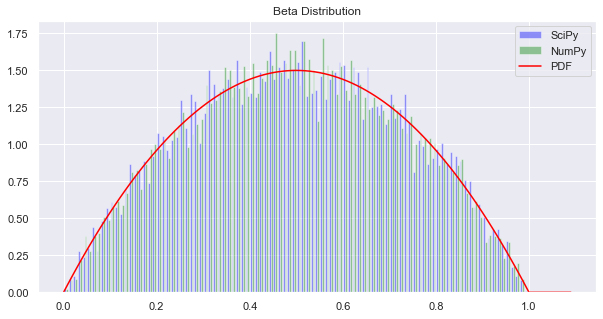

In [49]:
# 確率変数 x を渡すことで, それぞれに対応する確率密度関数の値を取得できる.
x = np.arange(0, 1.1, 0.01)
y = beta.pdf(x, a=a, b=b)

# 擬似乱数によるヒストグラムと確率密度関数の値を図示.
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.hist(
    [rvs, rvs_numpy],
    bins=x,
    density=True,
    color=["blue", "green"],
    alpha=0.4,
    label=["SciPy", "NumPy"],
)

ax1.plot(x, y, label="PDF", color="red")
ax1.legend()
ax1.set_title(f"Beta Distribution")

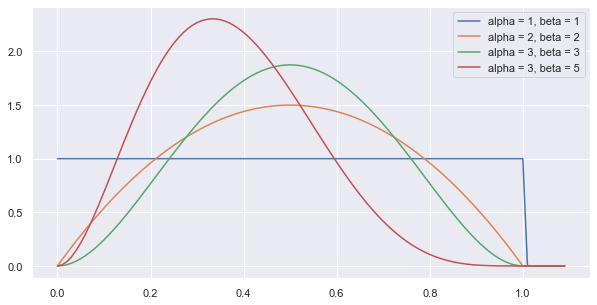

In [50]:
# a, b を動かした時の波形の違い.
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot(111)

params = [(1, 1), (2, 2), (3, 3), (3, 5)]
for a, b in params:
    y = beta.pdf(x, a=a, b=b)
    label = f"alpha = {a}, beta = {b}"
    ax2.plot(x, y, label=label)

ax2.legend()

#### ユースケース

- 工事中
